In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import natsort
import glob
import numpy as np
from scipy.signal import find_peaks
import matplotlib.ticker as ticker

In [2]:
path = r"C:/Data/SiPM/FBK-HD5/temp_IV_curves/"

##### Functions

In [3]:
def load_directory(path):
    csv_files = glob.glob(path + '*.csv')

    def extract_temp(filename):
        parts = filename.split('_')
        last_part = parts[-1].split('.')[0]
        temp = last_part.split('.')[0]
        return temp
    
    csv_files =natsort.realsorted(csv_files, key = extract_temp)

    print('Number of files found: ', len(csv_files))
    print(csv_files)
    return csv_files

In [4]:
def format_label(filename):
    print(f'Filename: {filename}, Type: {type(filename)}')
    parts = filename.split('_')

    last_part = parts[-1].split('.')[0]

    if last_part.startswith('n'):
        temp = last_part[1:]
        formatted_label = f'-{temp} C'
    else:
        formatted_label = f'{last_part} C'

    return formatted_label

##### Plot IV function

In [66]:
def plot_iv_temp(csv_files, labels):
    plt.figure(figsize=(10,6))
    for file, label in zip(csv_files, labels):
        # read files, columns
        data = pd.read_csv(file, header=None)
        data.columns = ['Voltage', 'Current']

        # correcting for negative amplitudes if any and voltages of -999
        data = data[data['Voltage'] > -990.0]
        data['Current'] = data['Current'].apply(lambda x: x if x>= 0 else -x)
        plt.semilogy(data['Voltage'], data['Current'], '-o', markersize=3, label=label)

    plt.title('IV curve comparison')
    plt.xlabel('Voltage [V]')
    plt.ylabel('Current [A]')
    plt.grid(True)
    plt.legend()

In [6]:
csv_files = load_directory(path)

Number of files found:  15
['C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240419_iv_curve_15.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240412_iv_curve_25.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240412_iv_curve_n1.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240412_iv_curve_n25.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n25.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n37.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240412_iv_curve_n50.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n50.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n62.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240412_iv_curve_n65.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n75.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n85.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n100.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240416_iv_curve_n108.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240419_iv

In [7]:
csv_files

['C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240419_iv_curve_15.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240412_iv_curve_25.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240412_iv_curve_n1.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240412_iv_curve_n25.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n25.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n37.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240412_iv_curve_n50.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n50.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n62.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240412_iv_curve_n65.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n75.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n85.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240415_iv_curve_n100.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240416_iv_curve_n108.csv',
 'C:/Data/SiPM/FBK-HD5/temp_IV_curves\\20240419_iv_curve_22_sta

In [8]:
labels = [format_label(name) for name in csv_files]
print(labels)

Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240419_iv_curve_15.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240412_iv_curve_25.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240412_iv_curve_n1.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240412_iv_curve_n25.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240415_iv_curve_n25.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240415_iv_curve_n37.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240412_iv_curve_n50.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240415_iv_curve_n50.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240415_iv_curve_n62.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240412_iv_curve_n65.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves\20240415_iv_curve_n75.csv, 

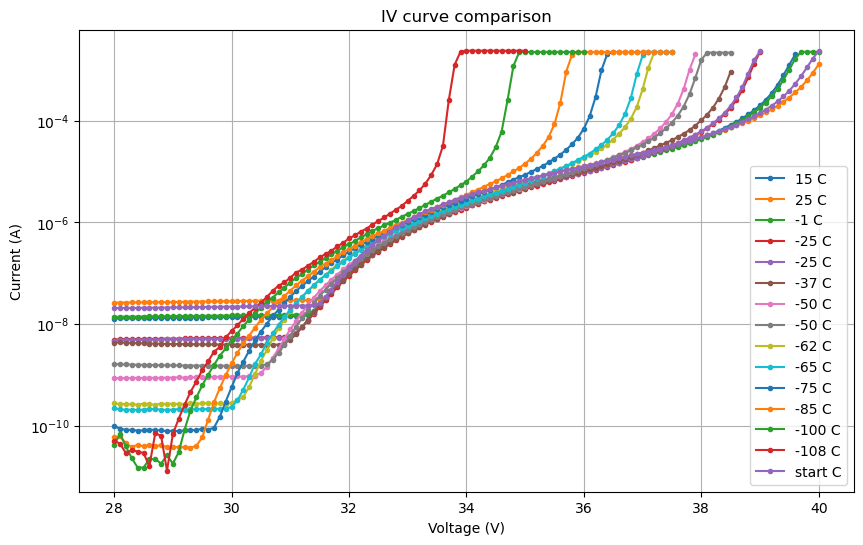

In [9]:
plot_iv_temp(csv_files, labels)

##### Extract & plot breakdown voltage function

In [10]:
def plot_iv_breakdown(csv_files, labels):
    
    for file, label in zip(csv_files, labels):
        plt.figure(figsize=(10,6))
        # read files, columns
        data = pd.read_csv(file, header=None)
        data.columns = ['Voltage', 'Current']

        # correcting for negative amplitudes
        data = data[data['Voltage'] > -990.0]
        data['Current'] = data['Current'].apply(lambda x: x if x>= 0 else -x)
        plt.semilogy(data['Voltage'], data['Current'], '-o', markersize=3, label=label)
        
        plt.title(f'IV curve {label}')
        plt.xlabel('Voltage (V)')
        plt.ylabel('Current (A)')
        plt.grid(True)
        plt.show()

        # finding breakdown voltage
        ln_I = np.log(data['Current'])
        # dln_I_dV = np.gradient(ln_I, data['Voltage'])
        dln_I_dV = np.gradient(ln_I)/ np.gradient(data['Voltage'])
       
        plt.figure(figsize=(10,6))
        plt.plot(data['Voltage'], dln_I_dV, '-o', markersize=3)
        plt.title(f'Derivative of IV plot {label}')
        plt.xlabel('Voltage (V)')
        plt.ylabel('dlnI/dV')
        plt.grid(True)
        plt.show()

        peaks, _ = find_peaks(dln_I_dV, height = np.max(dln_I_dV)*0.2)

        # seperate peaks into breakdown and 2nd divergence 
        breakdown_voltage = data['Voltage'][peaks]
        # breakdown_voltages.append(breakdown_voltage)

        if len(peaks) >= 3:
            avg_breakdown = np.mean(data['Voltage'][peaks[:2]])
            breakdown_voltages.append(avg_breakdown)
            second_peak = data['Voltage'][peaks[2]]
            second_divergences.append(second_peak)
        elif len(peaks) > 0:
            first_peak = data['Voltage'][peaks[0]]
            breakdown_voltages.append(first_peak)

            if len(peaks) > 1:
                second_peak = data['Voltage'][peaks[1]]
                second_divergences.append(second_peak)

        plt.figure(figsize=(10,6))
        plt.semilogy(data['Voltage'], data['Current'], '-o', markersize=3)
        plt.scatter(data['Voltage'][peaks], data['Current'][peaks], color='red', label = breakdown_voltage, zorder=5)
        plt.title(f'IV with breakdown voltage {label}')
        plt.xlabel('Voltage (V)')
        plt.ylabel('Current (A)')
        plt.grid(True)
        plt.legend()
        plt.show()


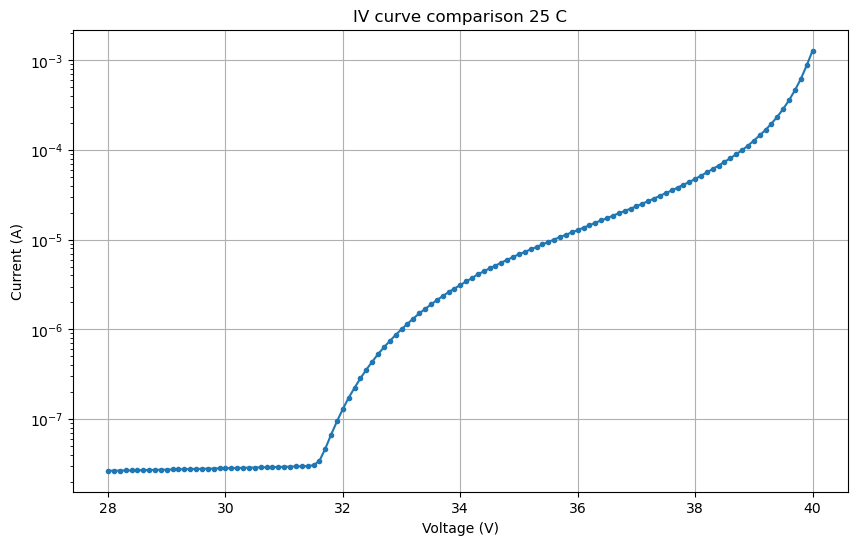

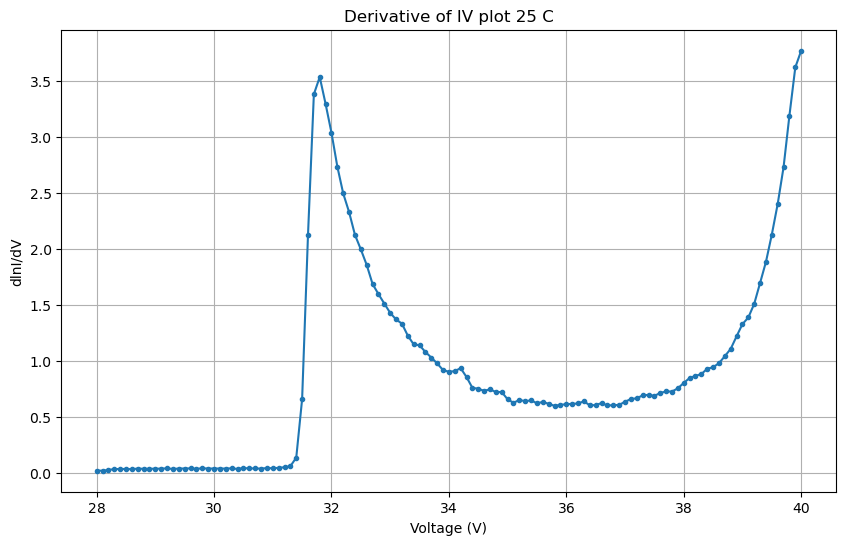

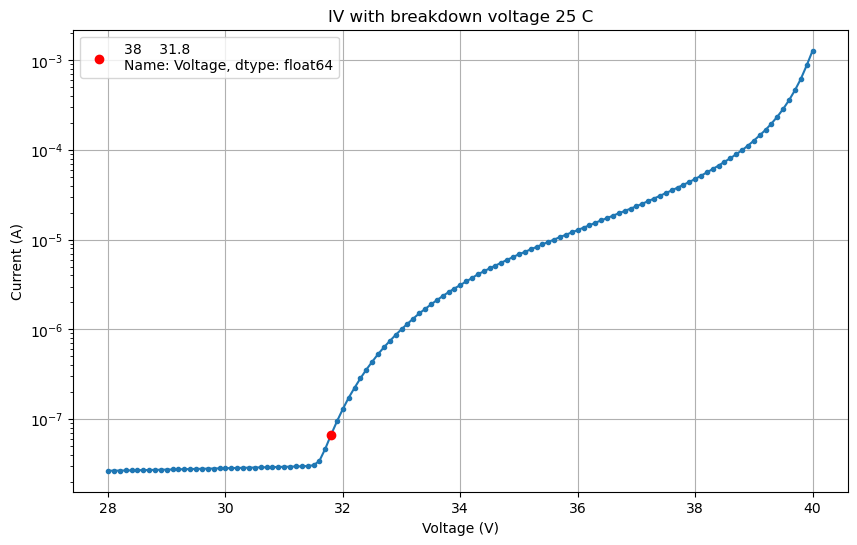

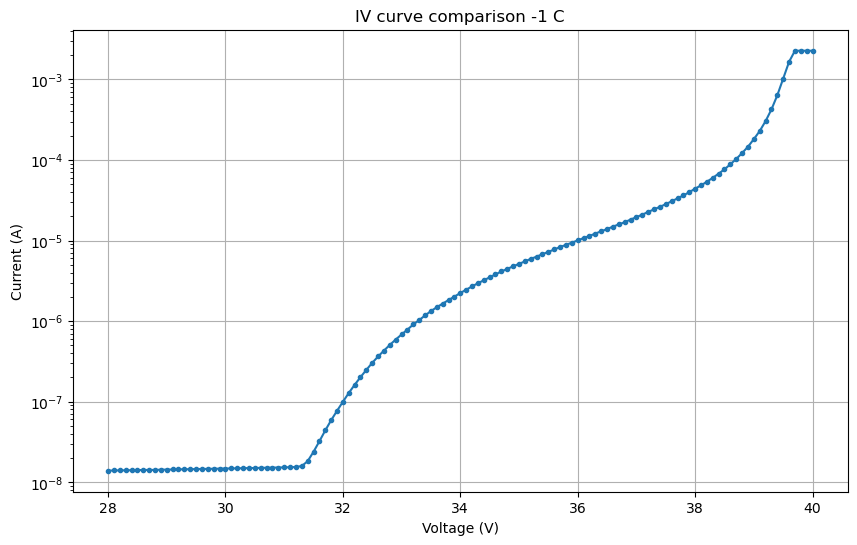

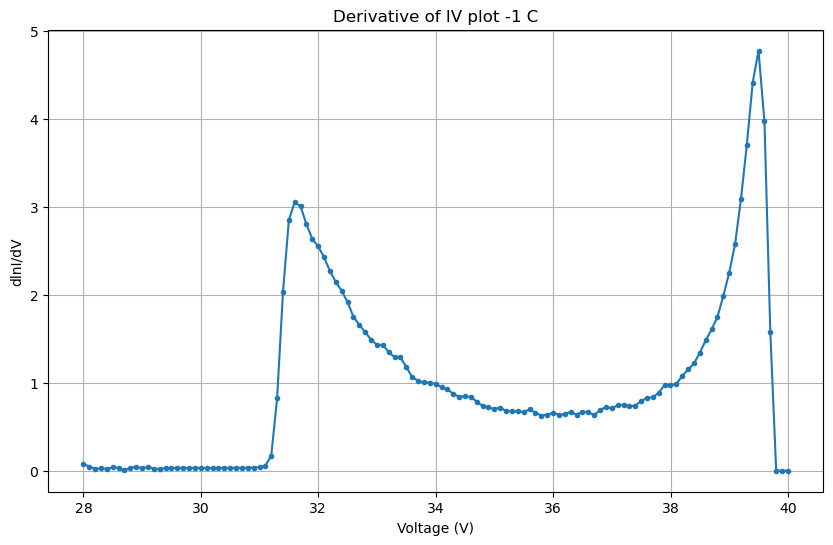

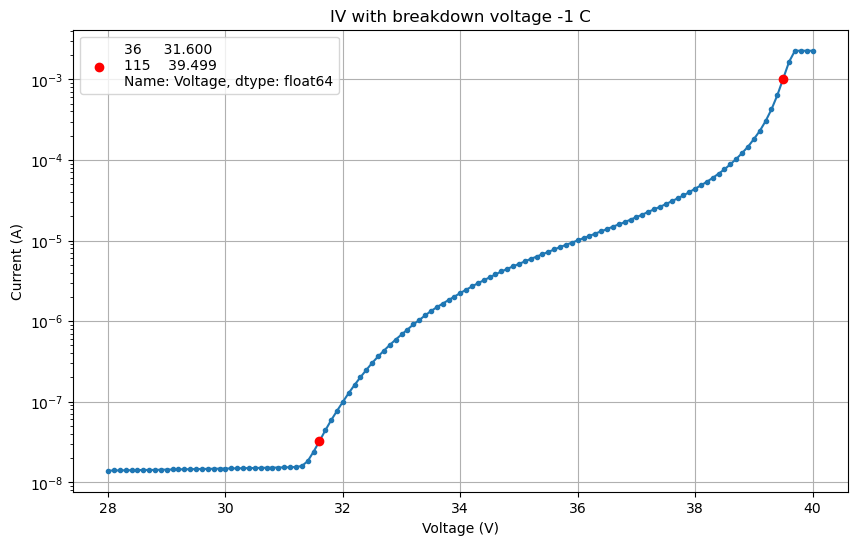

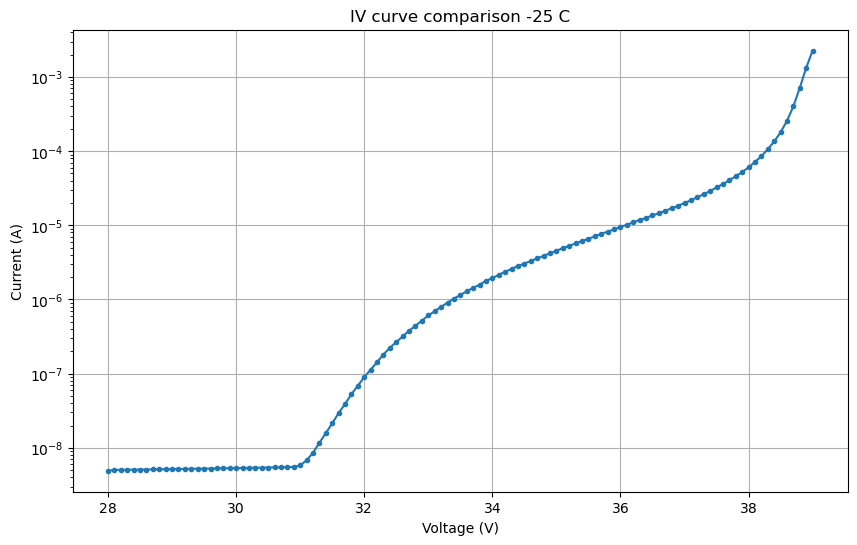

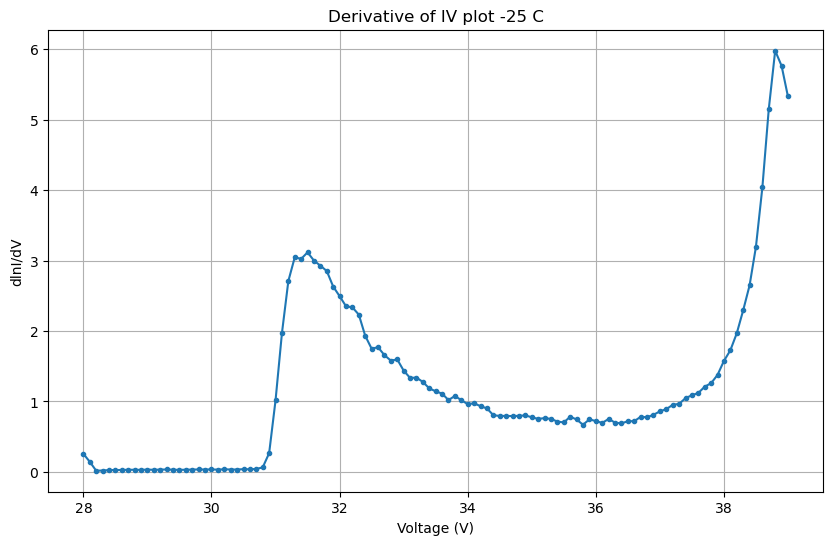

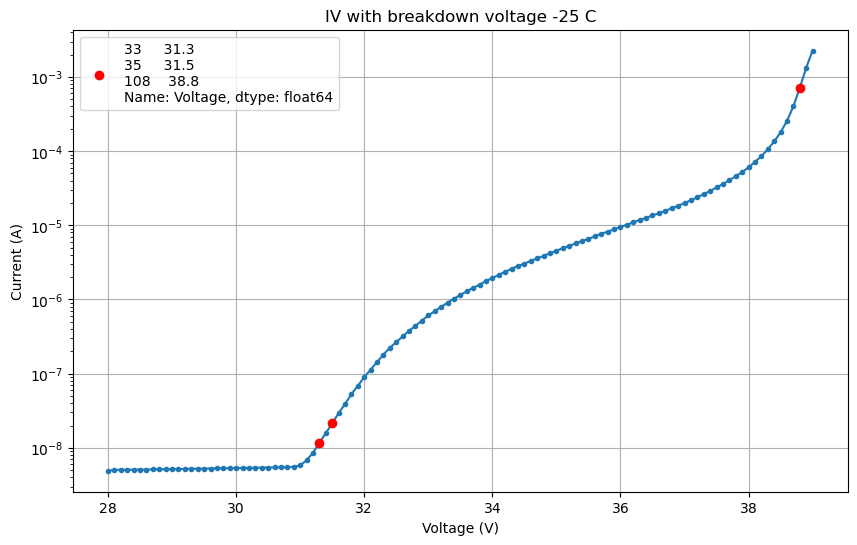

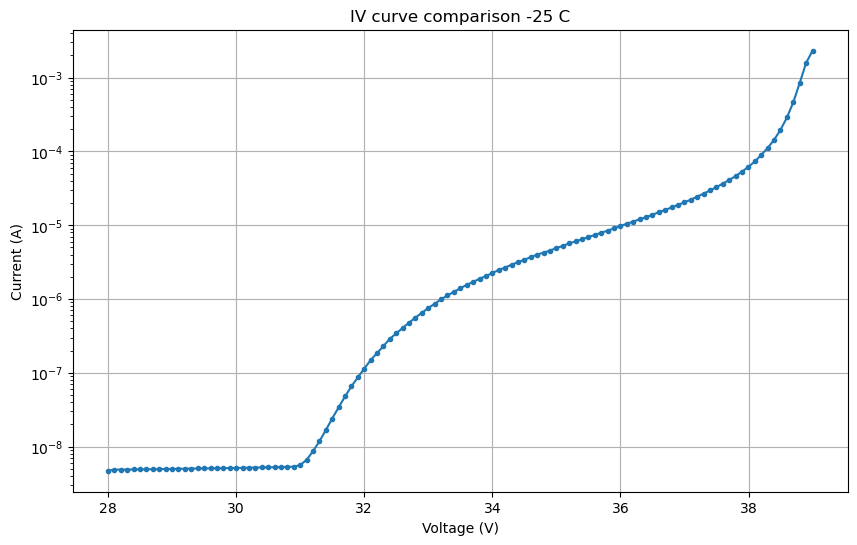

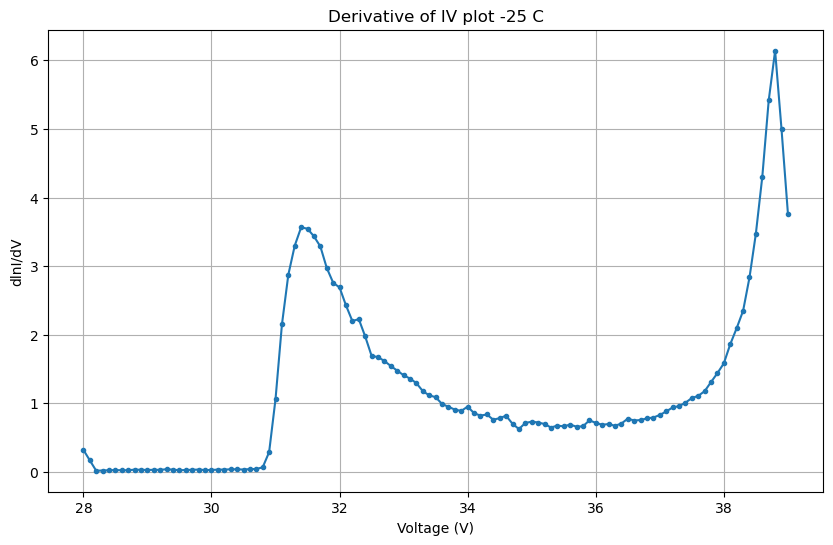

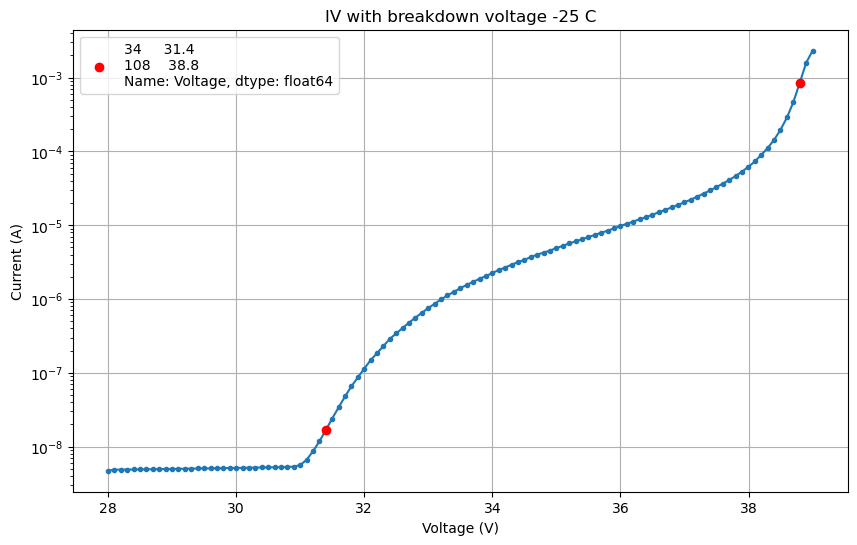

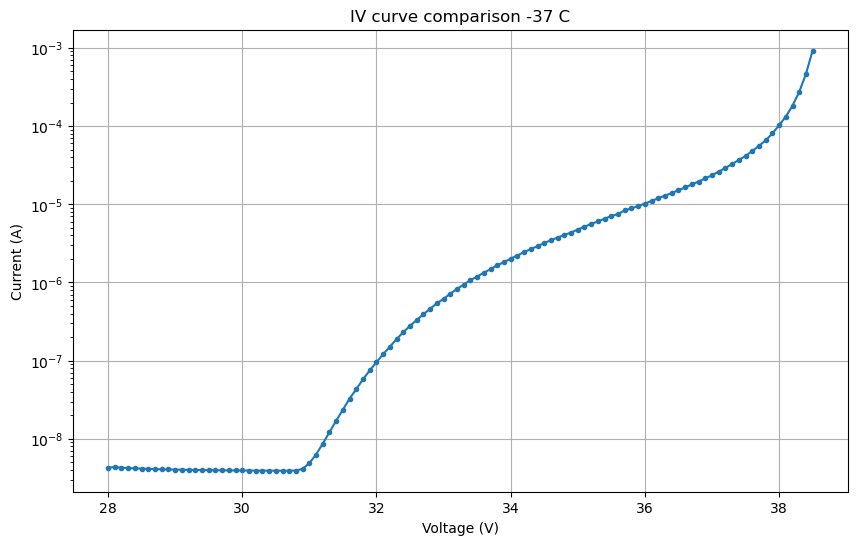

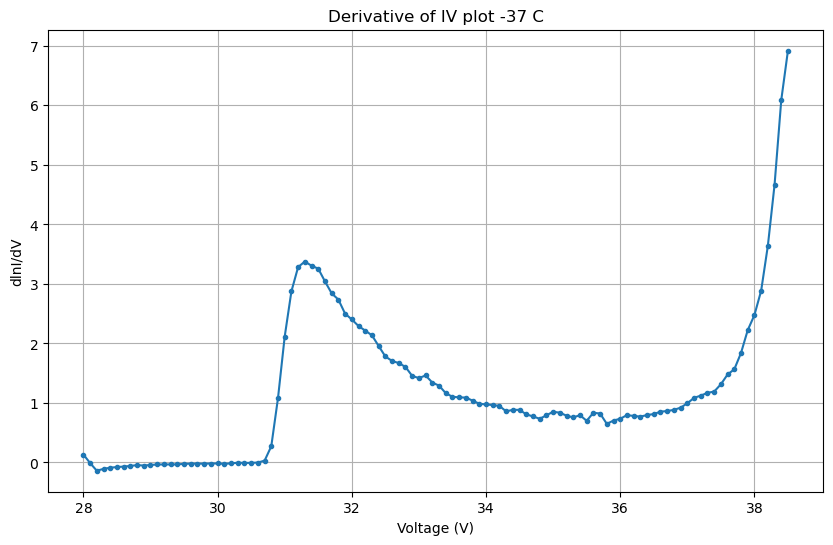

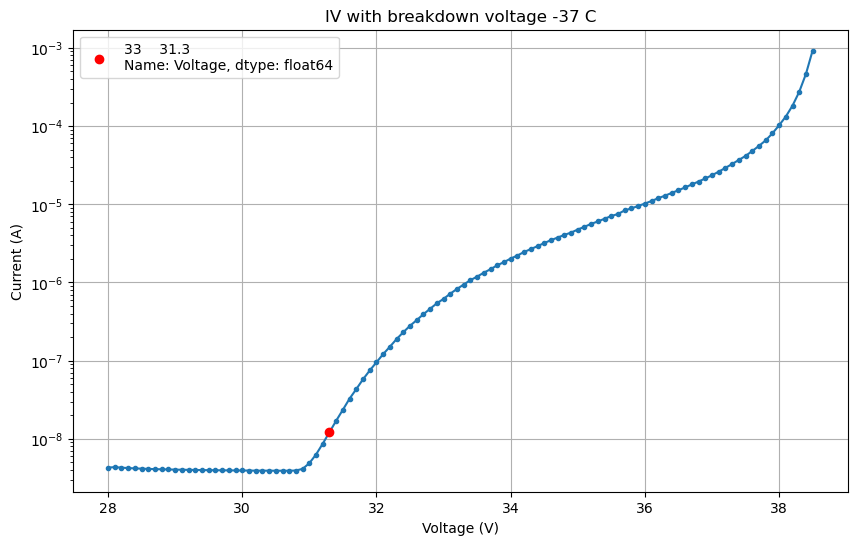

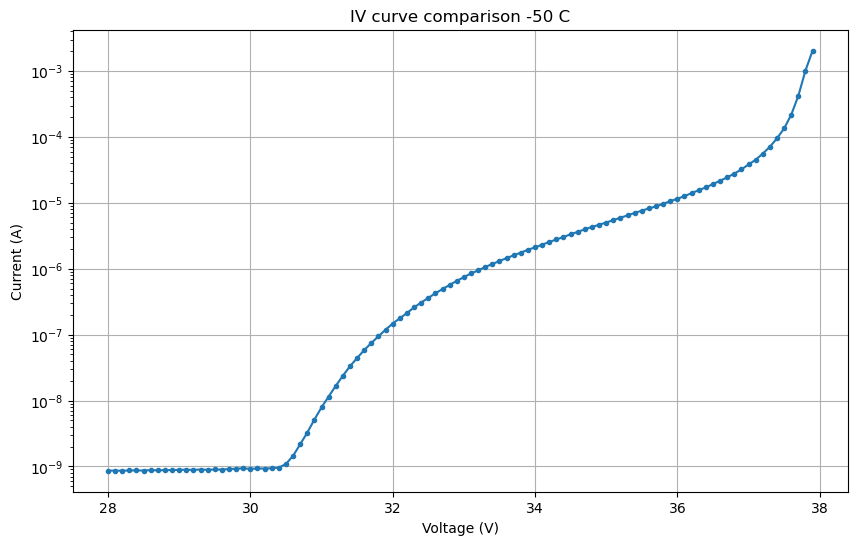

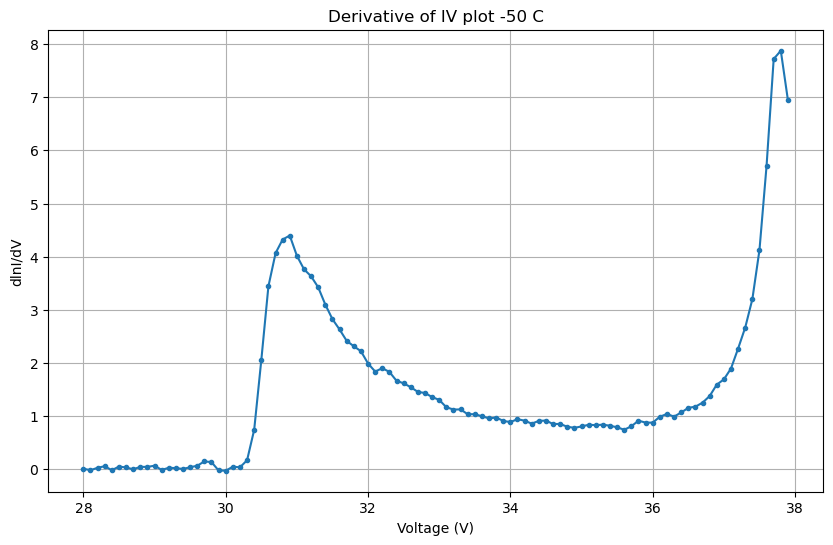

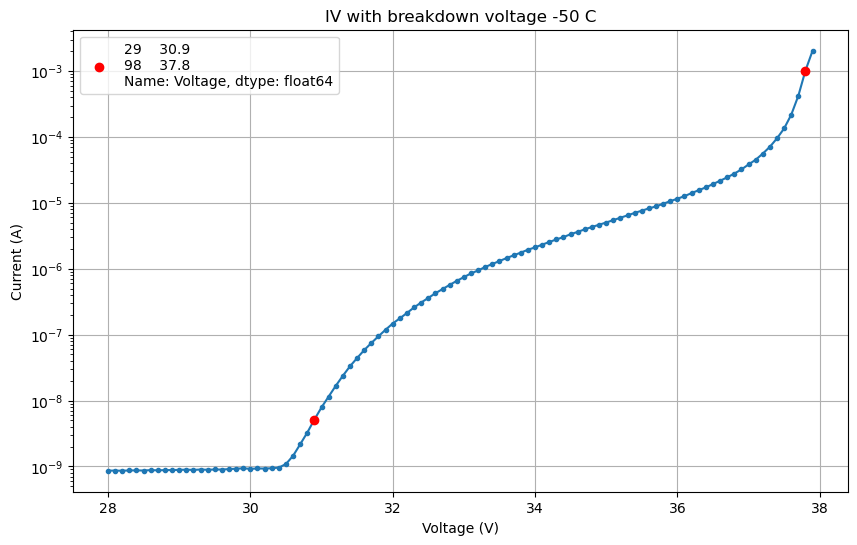

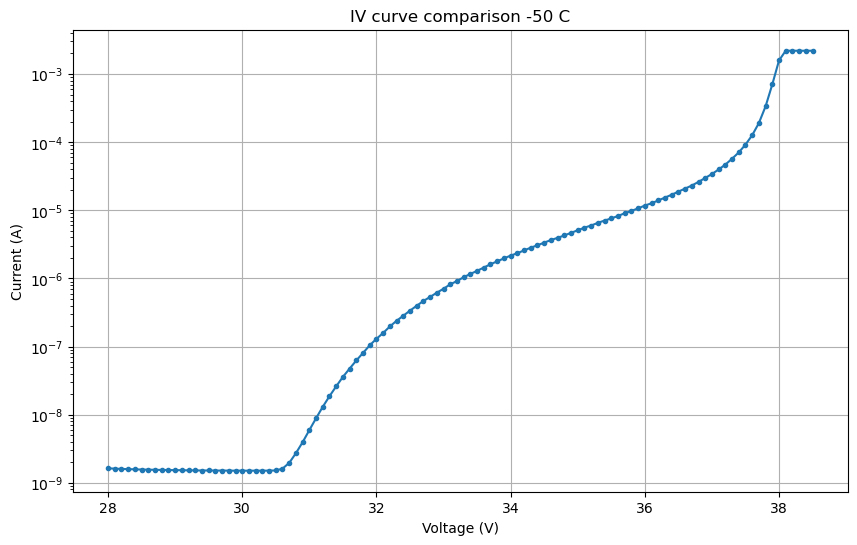

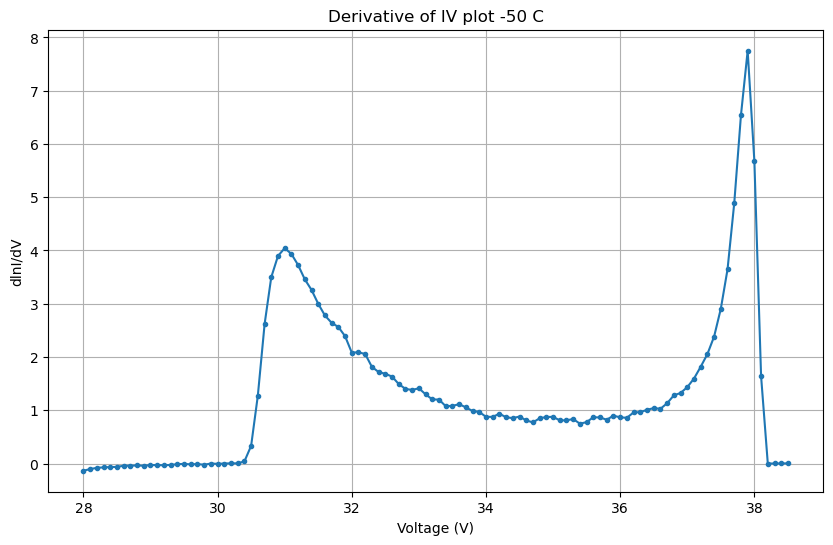

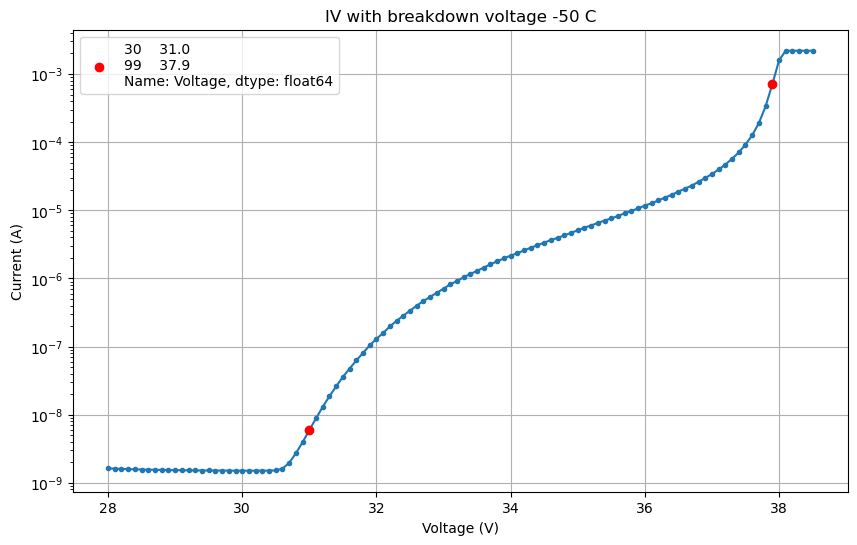

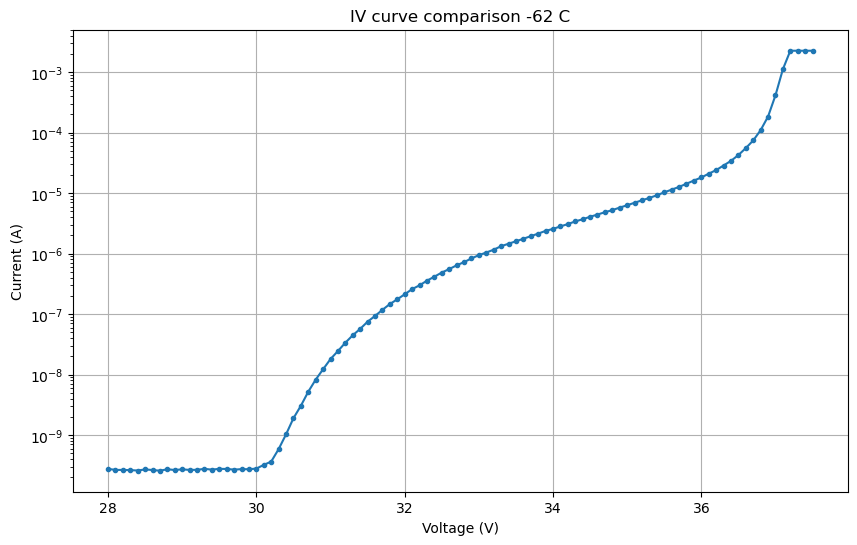

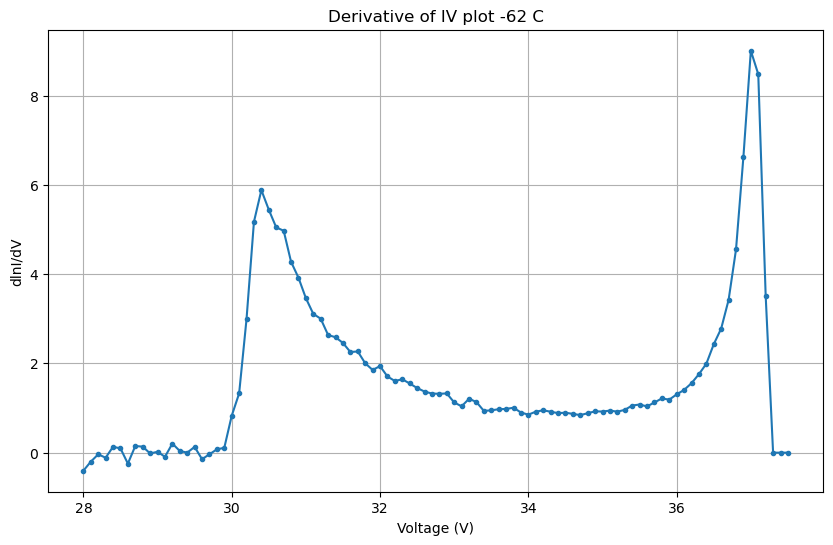

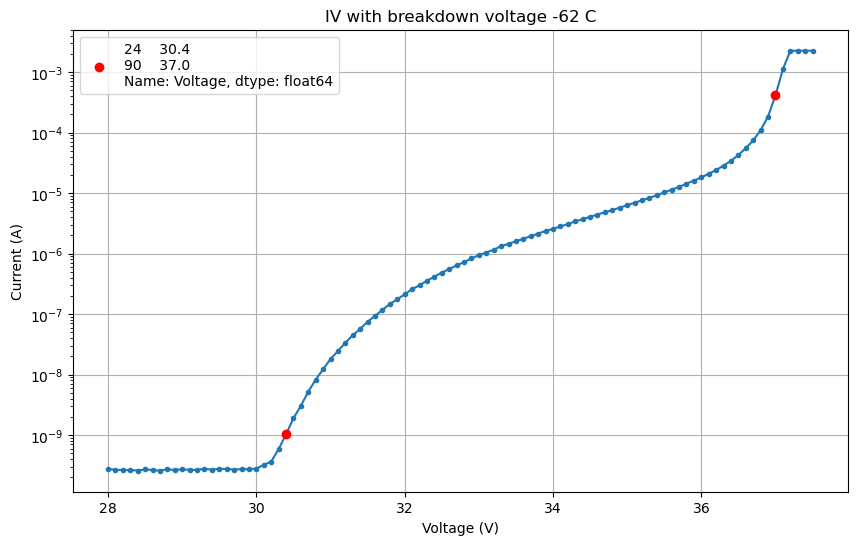

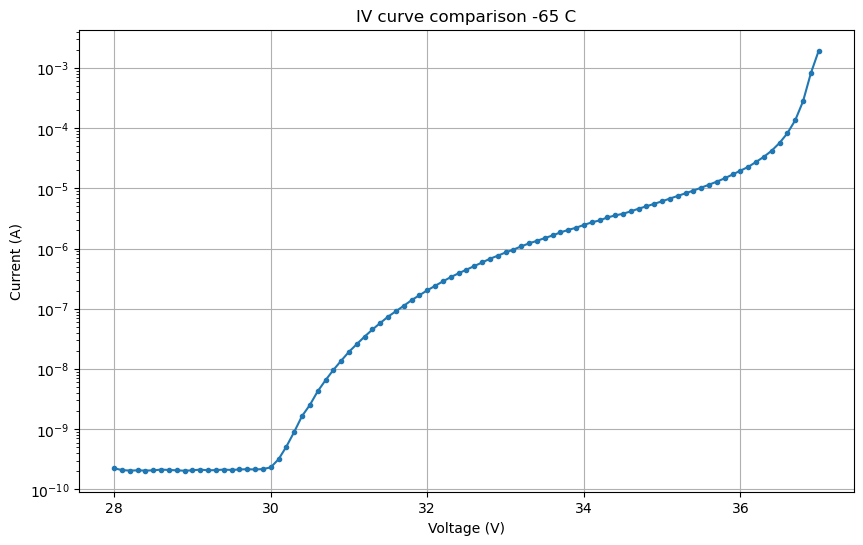

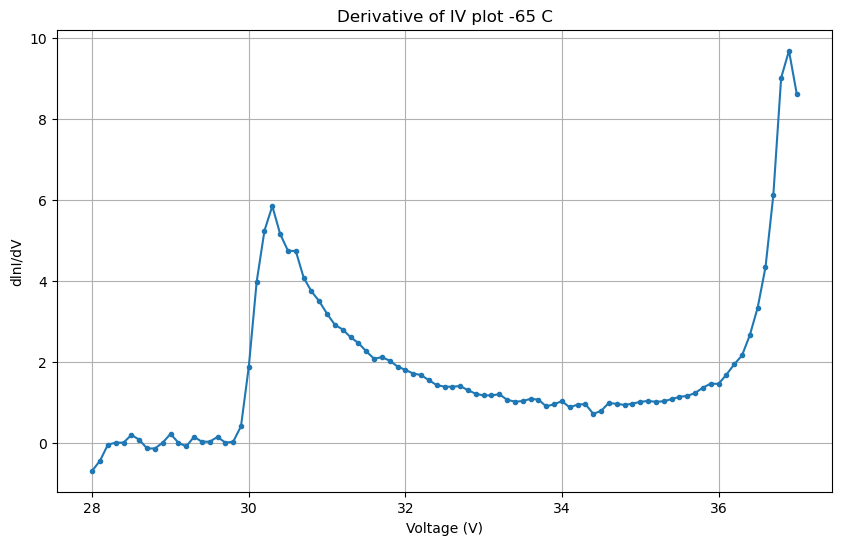

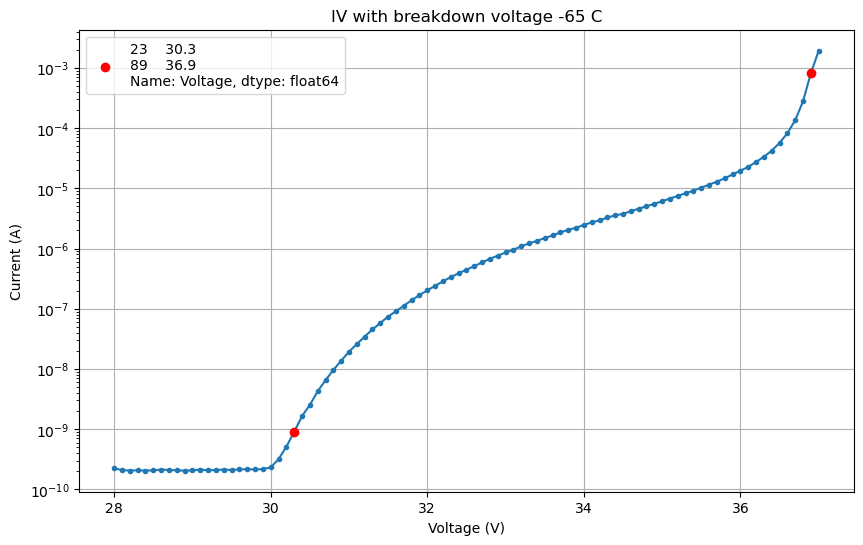

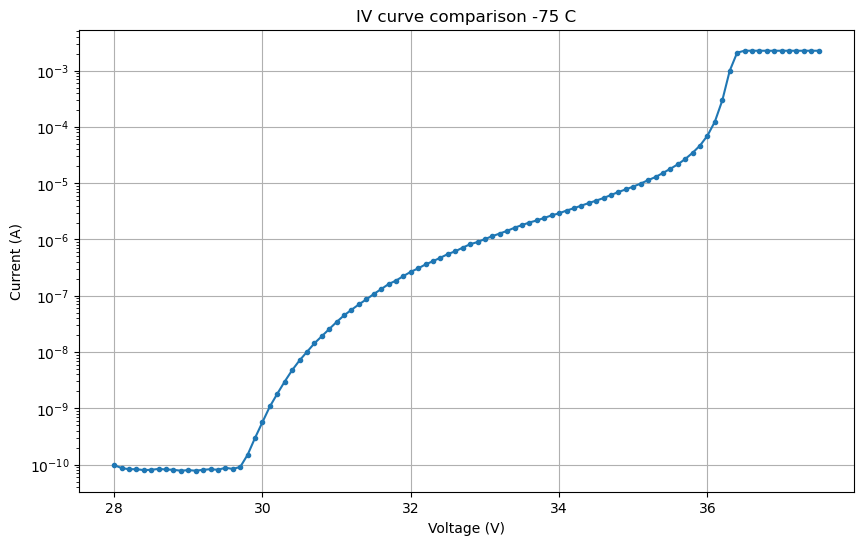

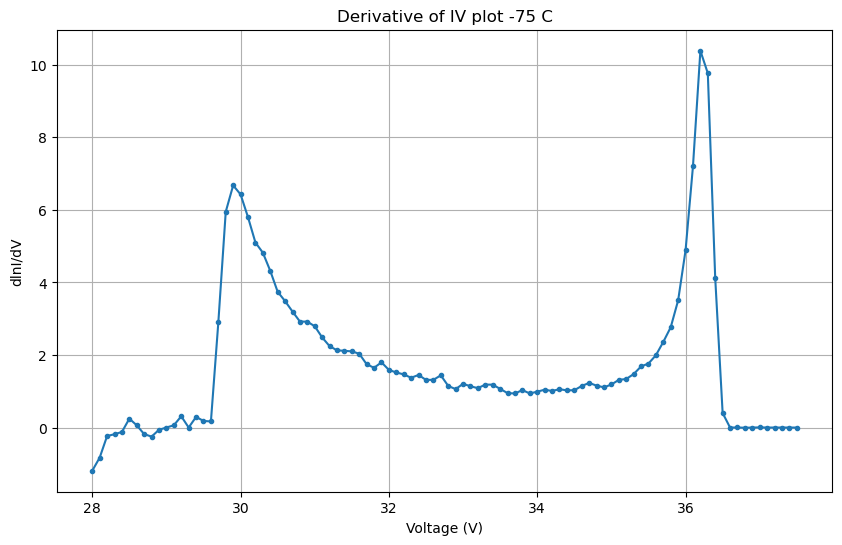

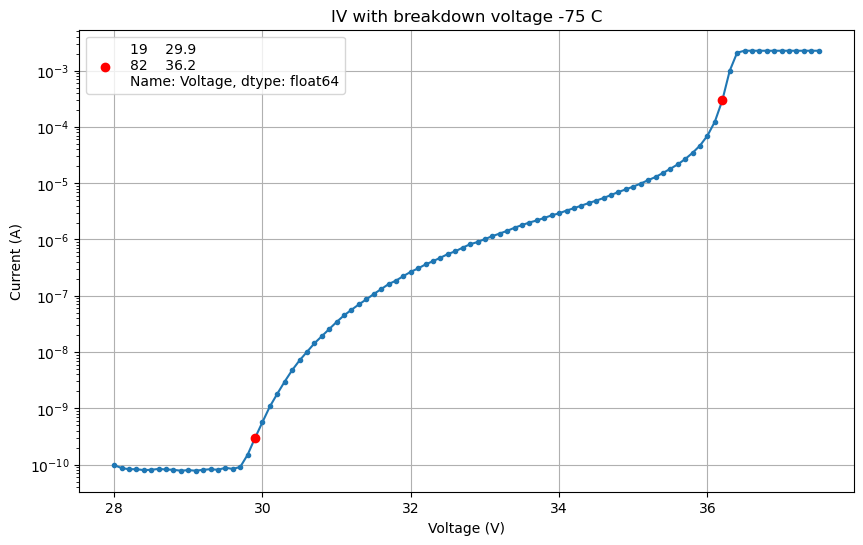

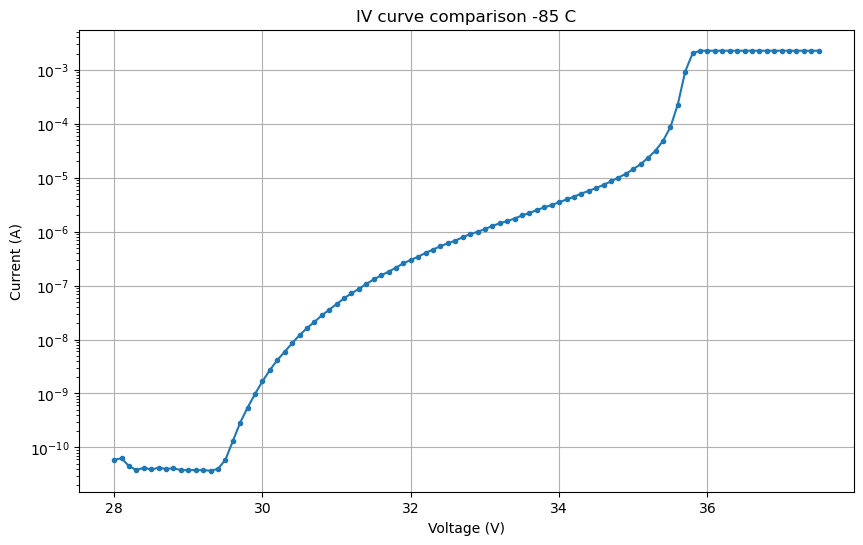

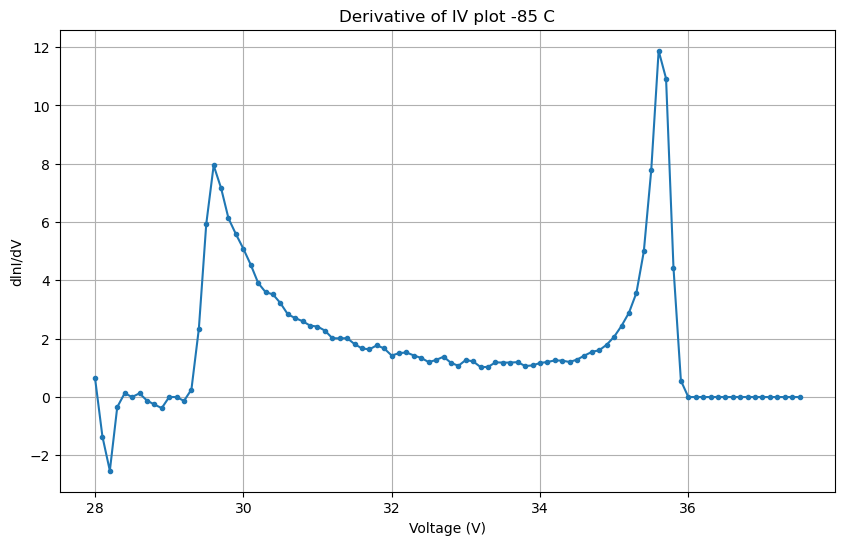

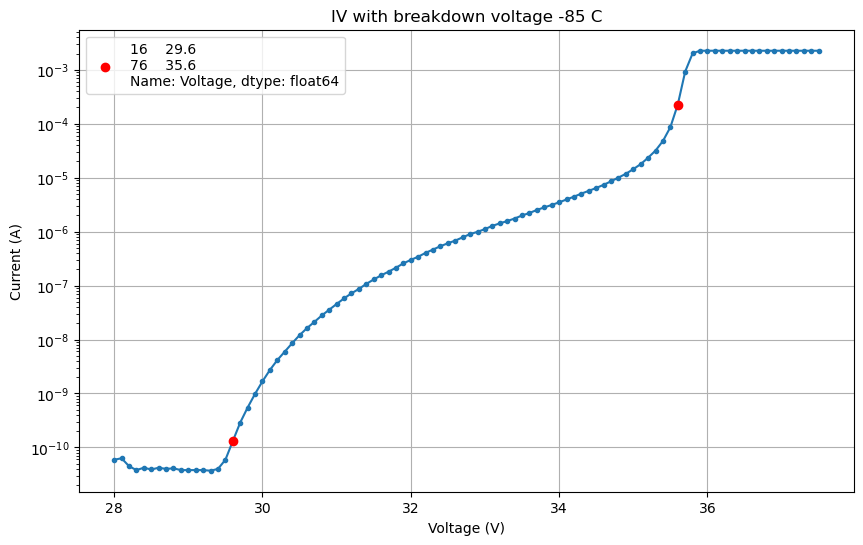

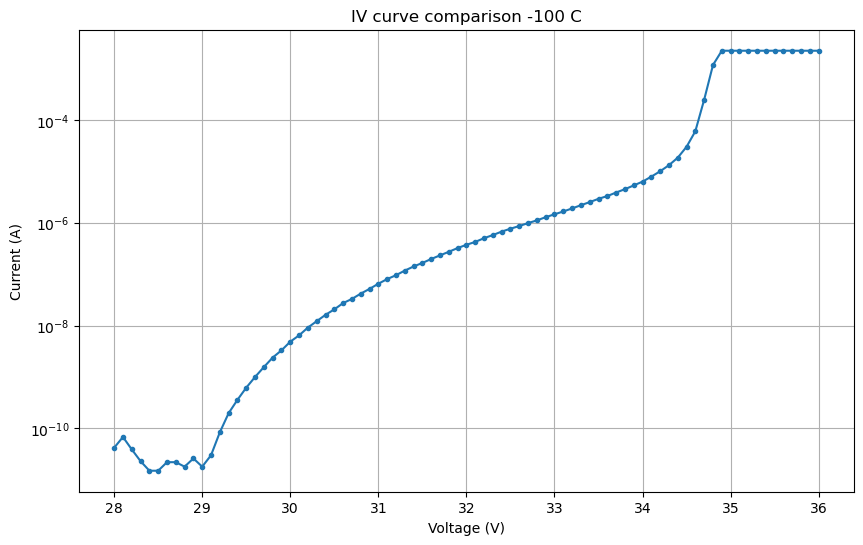

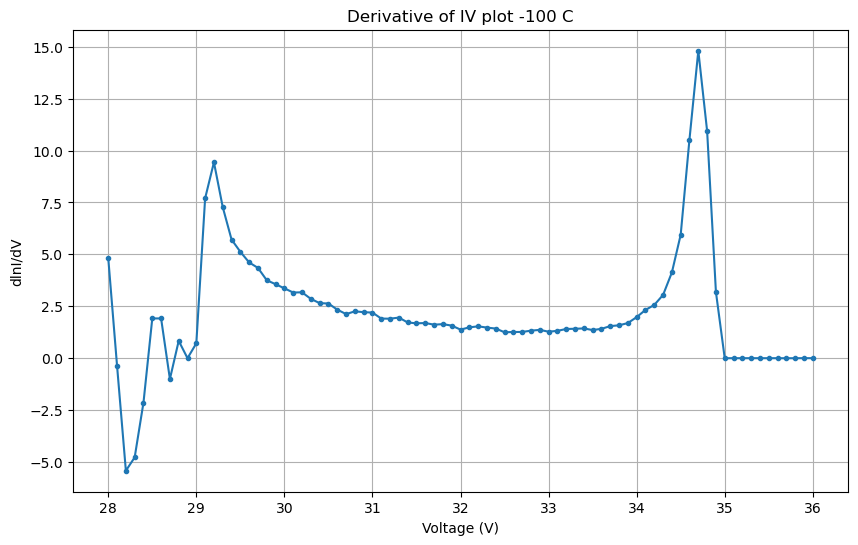

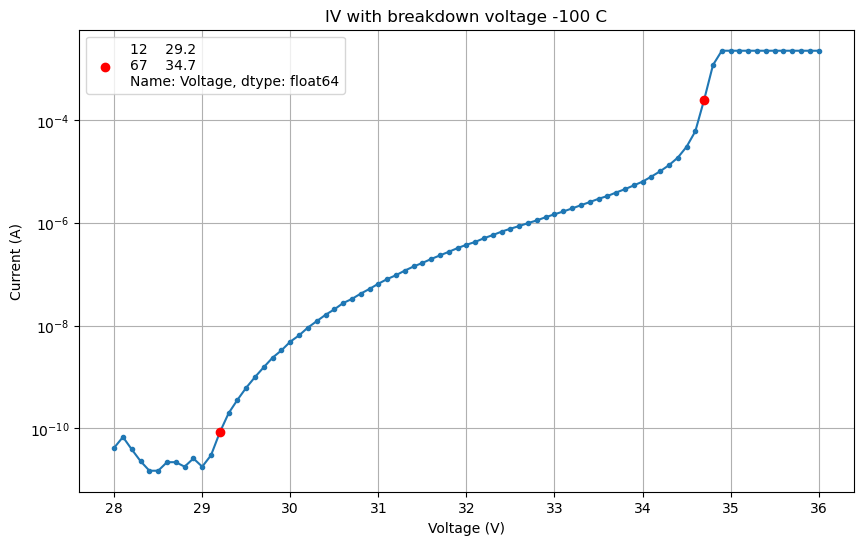

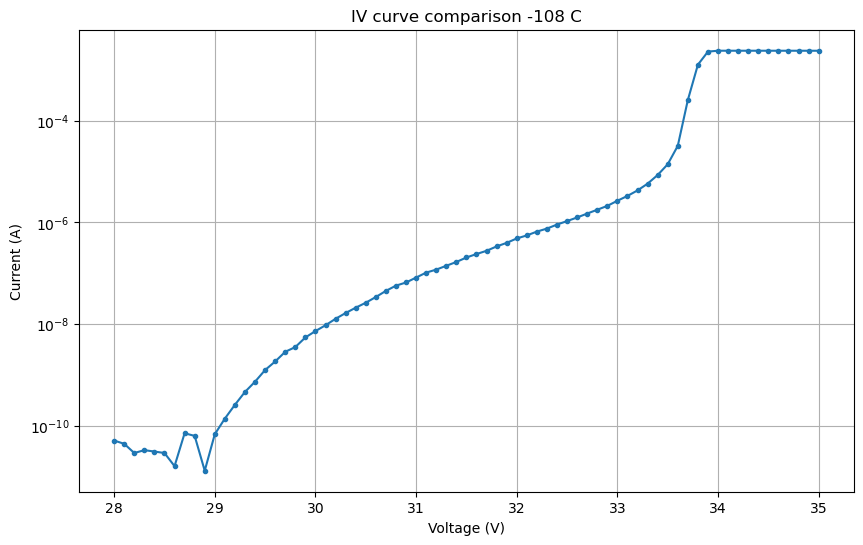

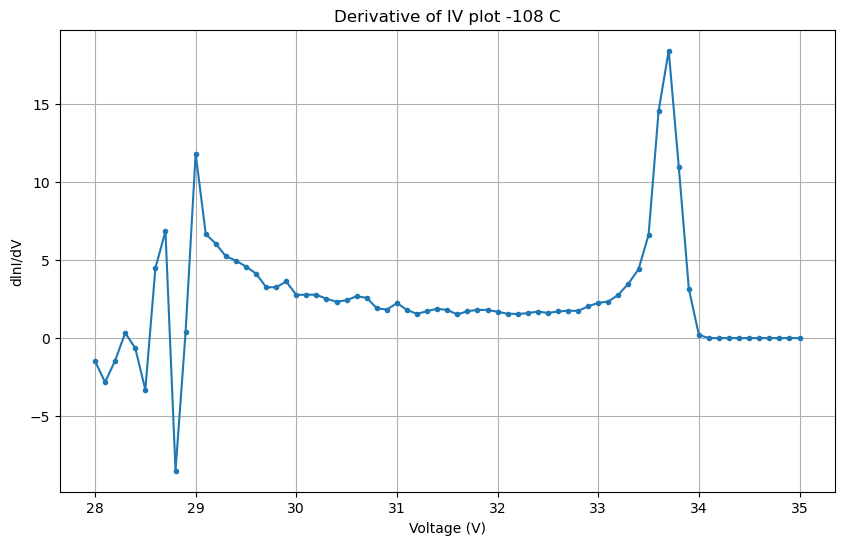

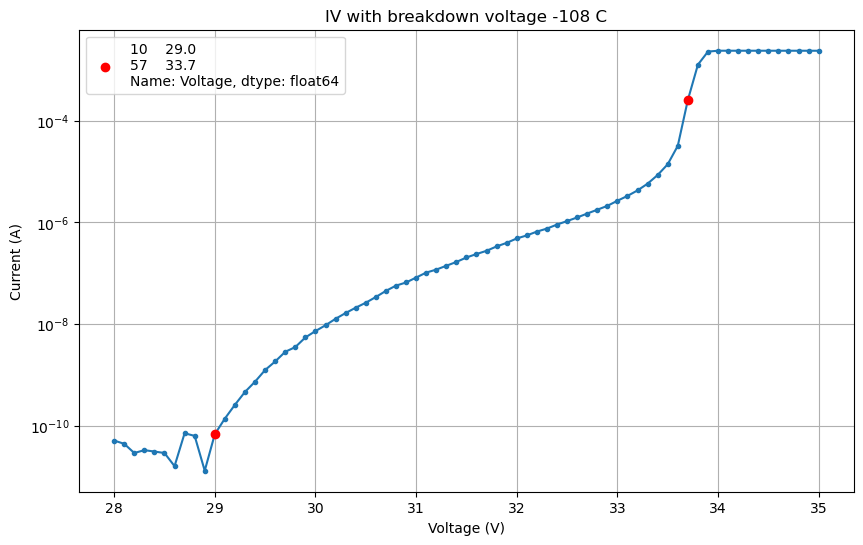

In [96]:

breakdown_voltages = []
second_divergences = []
plot_iv_breakdown(csv_files, labels)

In [97]:
print(len(breakdown_voltages))
print(breakdown_voltages)

13
[31.8, 31.6, 31.4, 31.4, 31.3, 30.9, 31.0, 30.4, 30.3, 29.9, 29.6, 29.2, 29.0]


In [98]:
print(len(second_divergences))
print(second_divergences)

11
[39.499, 38.8, 38.8, 37.8, 37.9, 37.0, 36.9, 36.2, 35.6, 34.7, 33.7]


In [103]:
def label_to_temp_kelvin(label):
    temp_celcius = int(label.split()[0])
    return temp_celcius + 273

In [105]:
temps = [label_to_temp_kelvin(label) for label in labels]
print(temps)

[298, 272, 248, 248, 236, 223, 223, 211, 208, 198, 188, 173, 165]


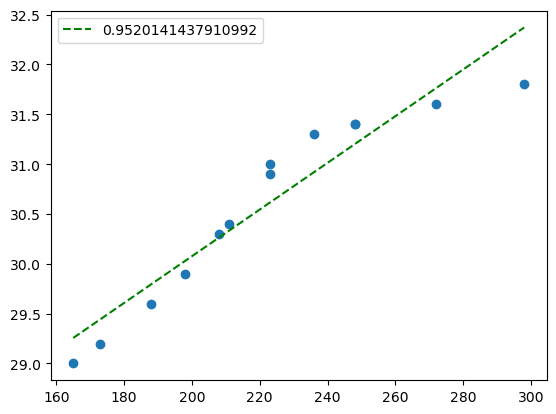

In [116]:
plt.plot(figsize=(10,6))
plt.scatter(np.array(temps), np.array(breakdown_voltages))
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(temps), np.array(breakdown_voltages))
x = np.linspace(165, max(np.array(temps)), 100)
y = slope * x + intercept
plt.plot(x,y, '--', color = 'green', label = r_value)
plt.legend()

#### April 19th: Better rtd positioning

In [59]:
path = r"C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419/"

In [67]:
csv_files = load_directory(path)

Number of files found:  10
['C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\\20240419_iv_curve_0.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\\20240419_iv_curve_22.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\\20240419_iv_curve_n10.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\\20240419_iv_curve_n15.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\\20240419_iv_curve_n25.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\\20240419_iv_curve_n35.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\\20240419_iv_curve_n50.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\\20240420_iv_curve_n75.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\\20240420_iv_curve_n90.csv', 'C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\\20240421_iv_curve_n100.csv']


In [68]:
labels = [format_label(name) for name in csv_files]
print(labels)

Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\20240419_iv_curve_0.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\20240419_iv_curve_22.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\20240419_iv_curve_n10.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\20240419_iv_curve_n15.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\20240419_iv_curve_n25.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\20240419_iv_curve_n35.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\20240419_iv_curve_n50.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\20240420_iv_curve_n75.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\20240420_iv_curve_n90.csv, Type: <class 'str'>
Filename: C:/Data/SiPM/FBK-HD5/temp_IV_curves/20240419\20240421_iv_curve_n100.csv, Ty

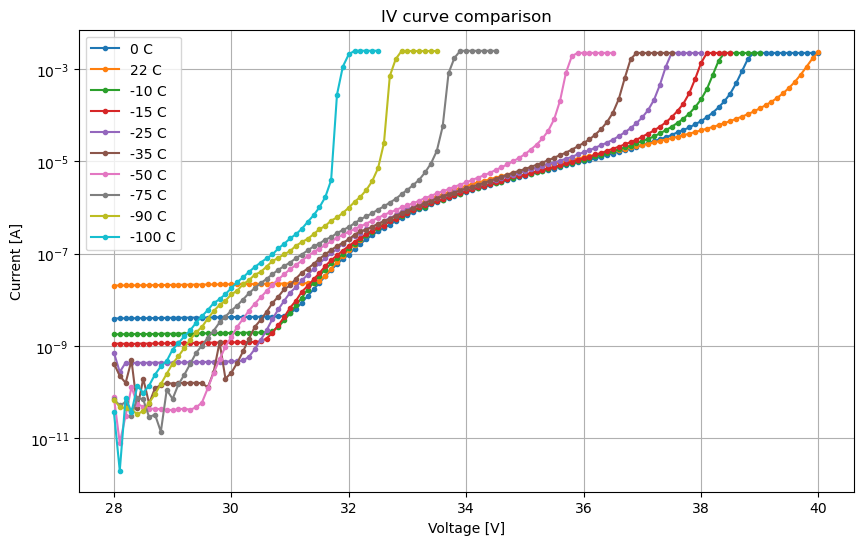

In [70]:
plot_iv_temp(csv_files, labels)

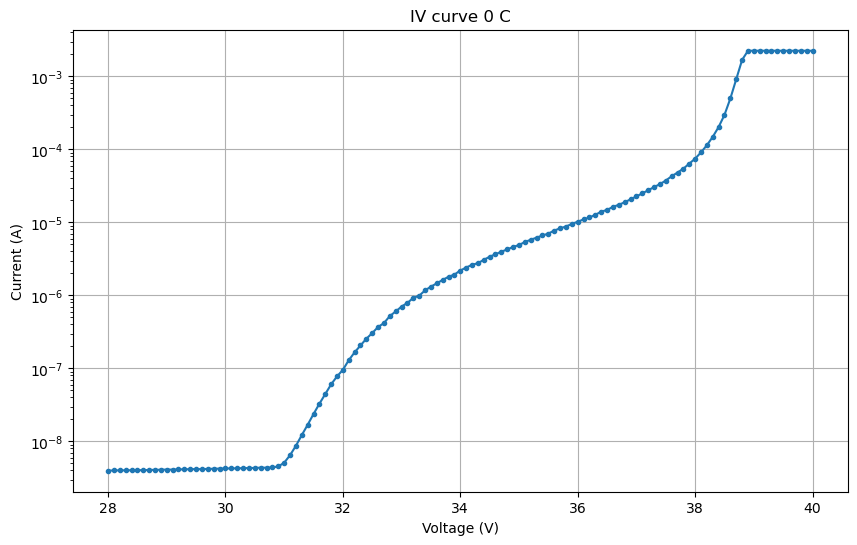

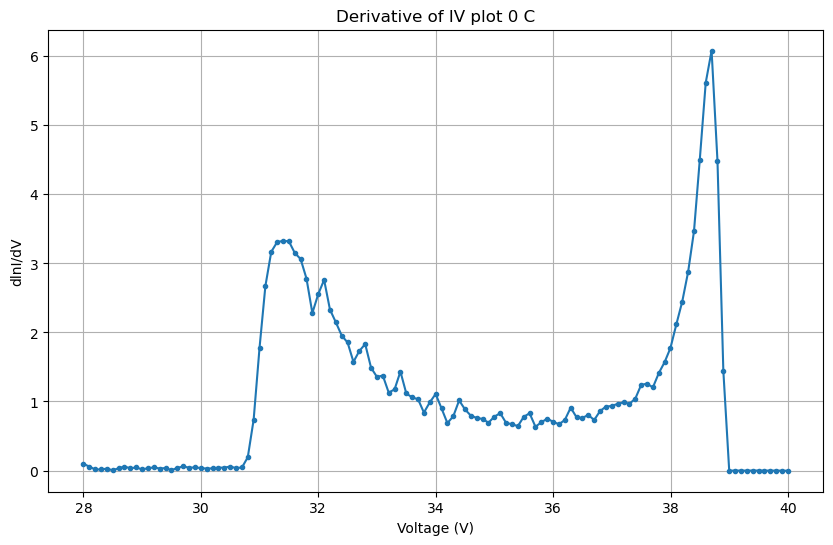

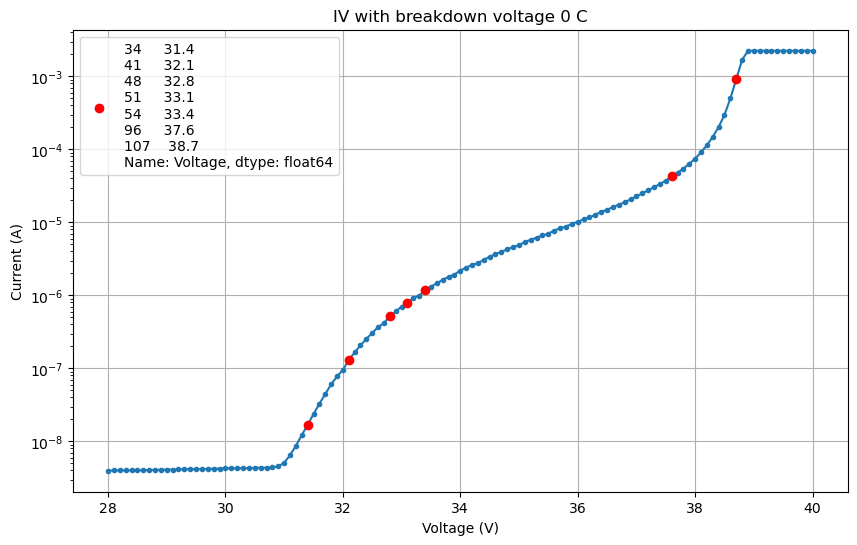

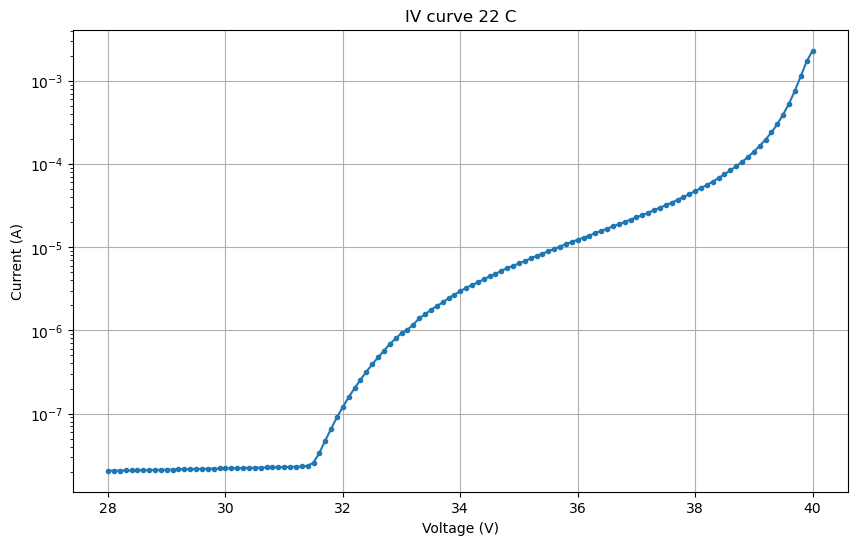

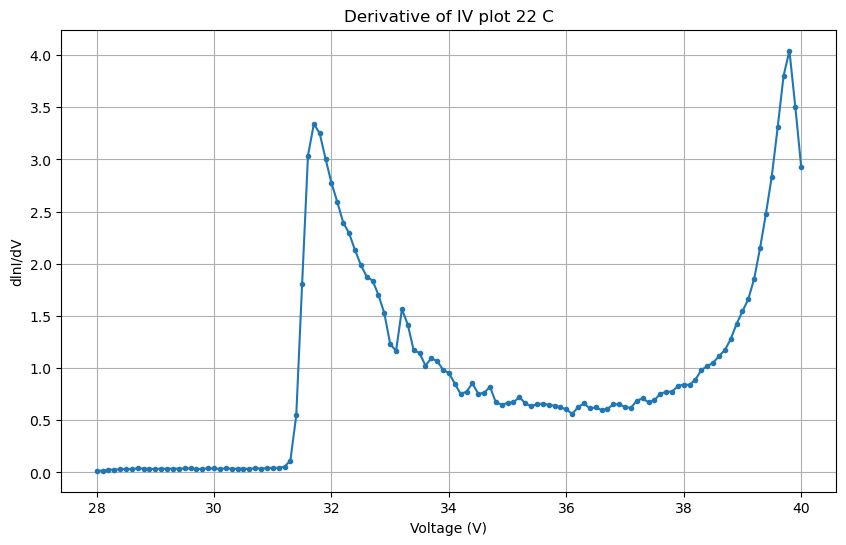

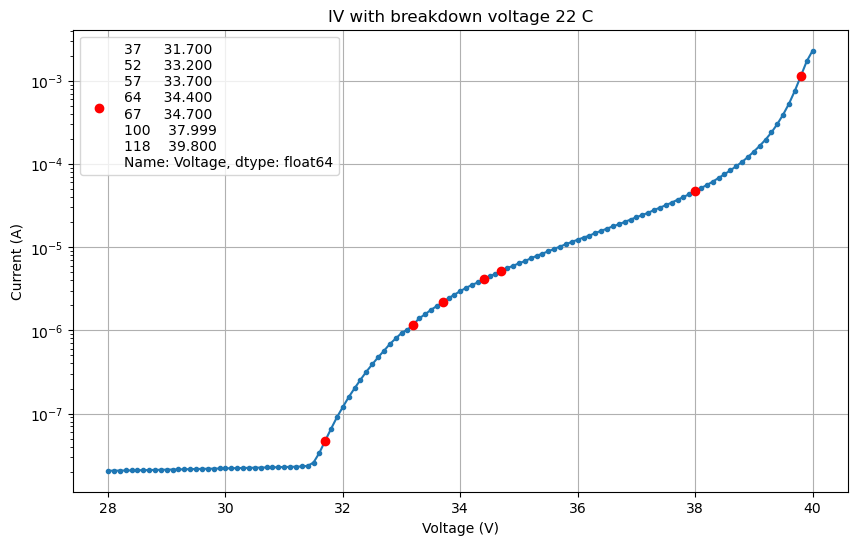

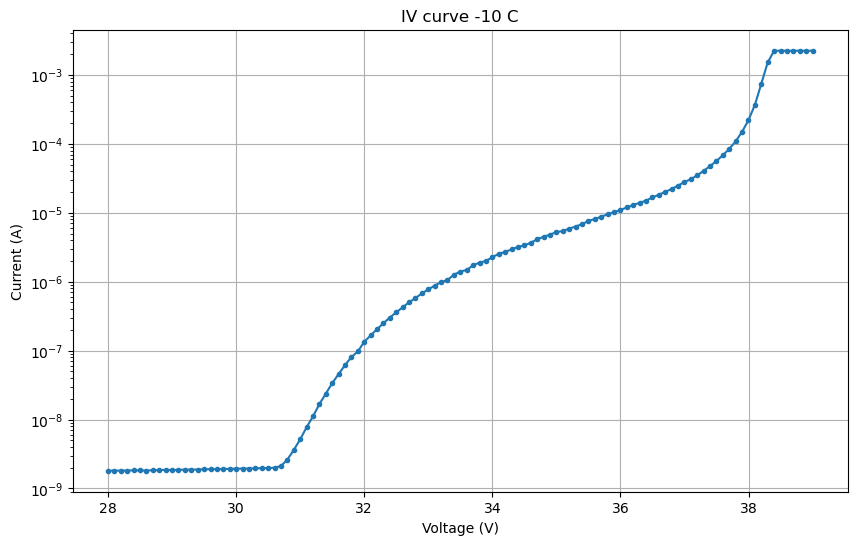

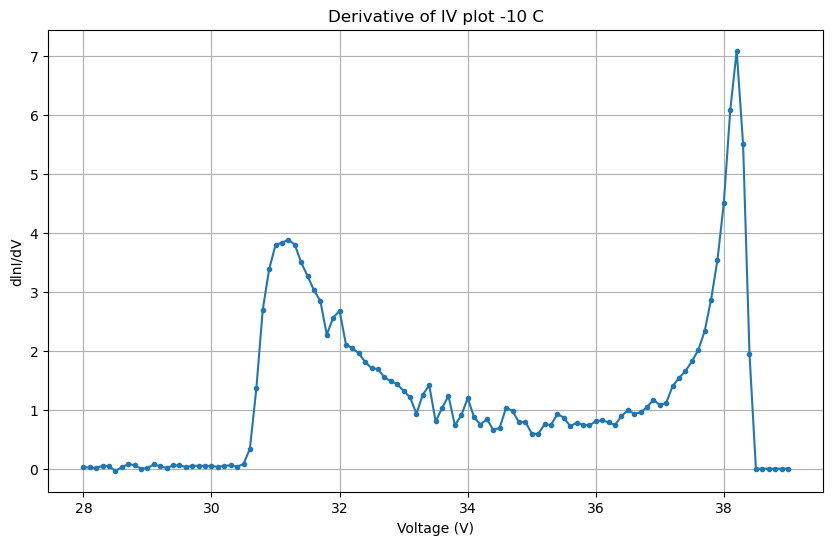

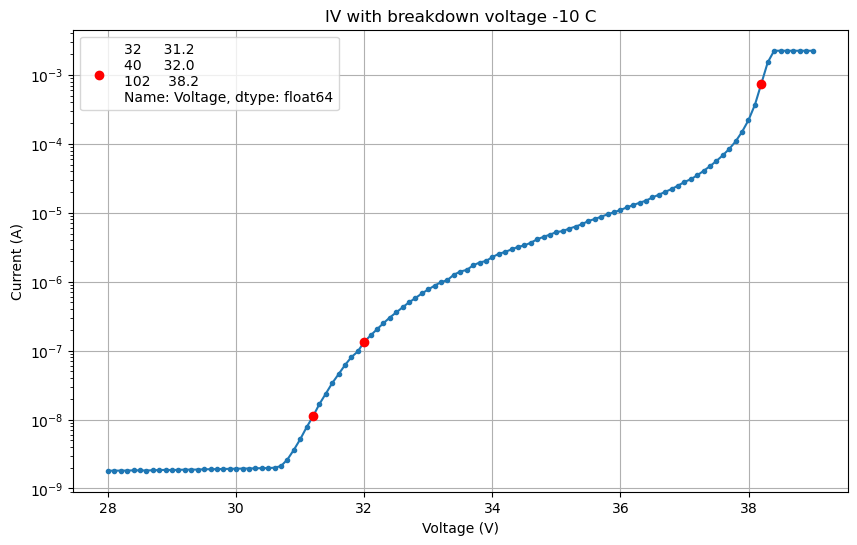

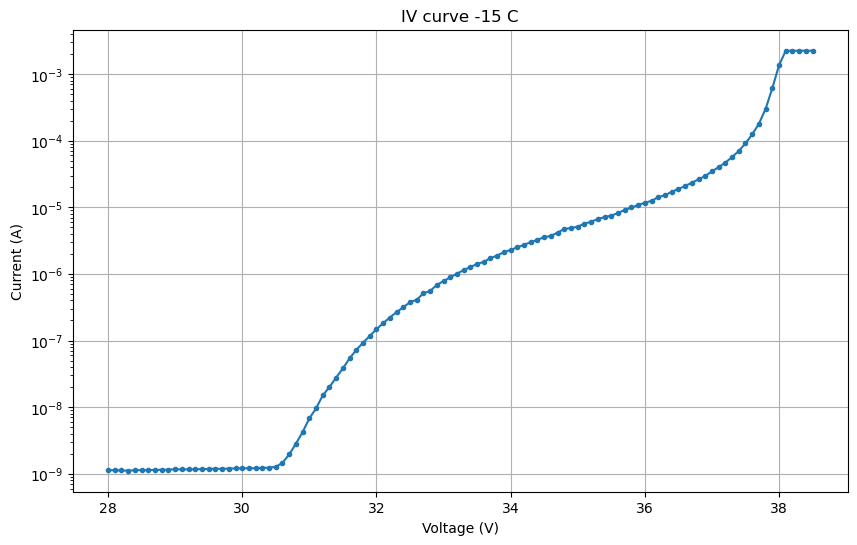

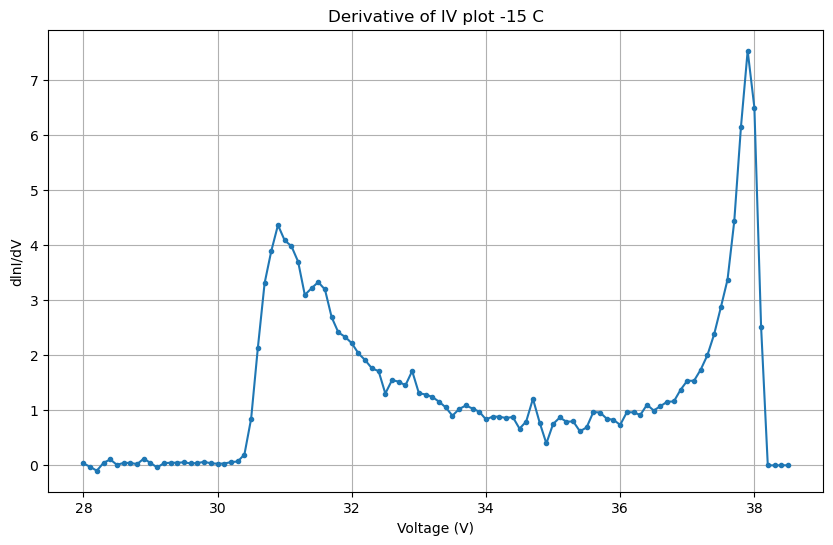

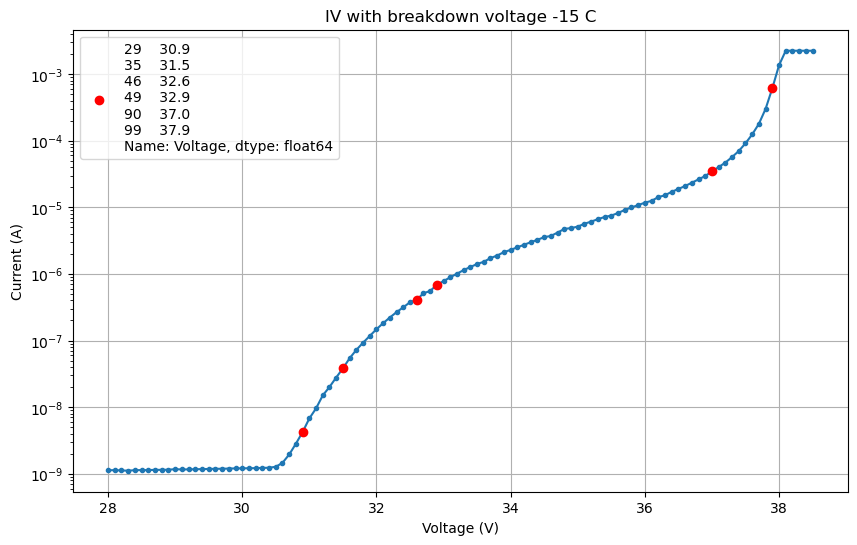

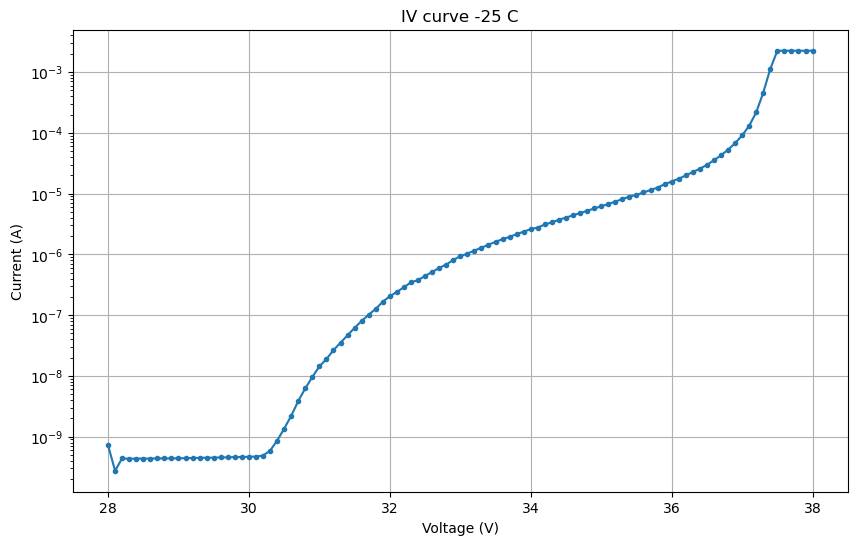

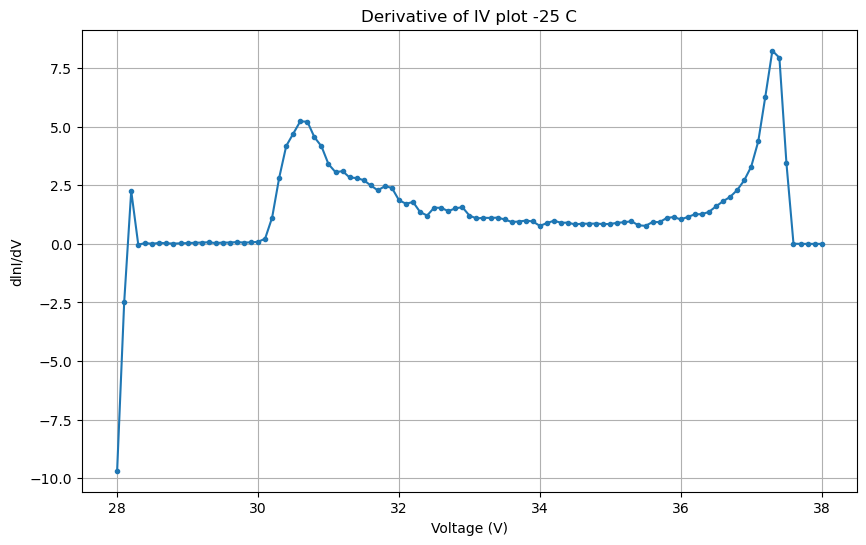

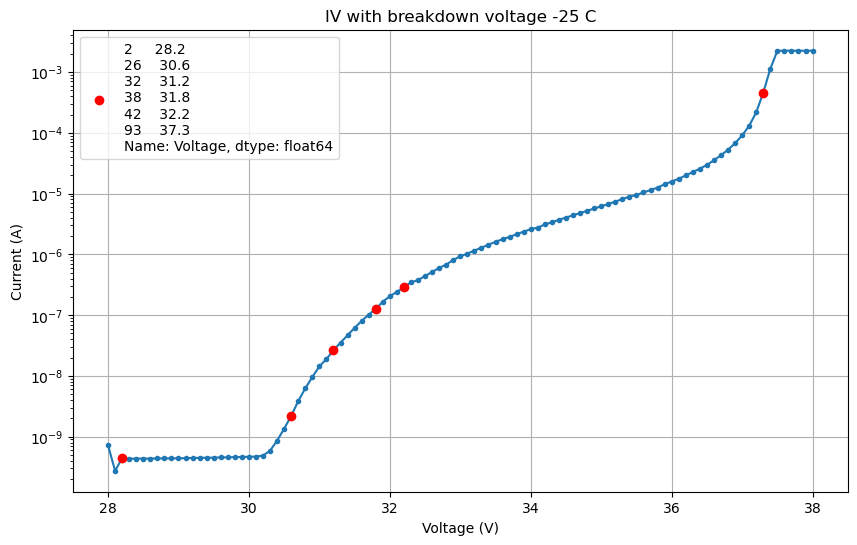

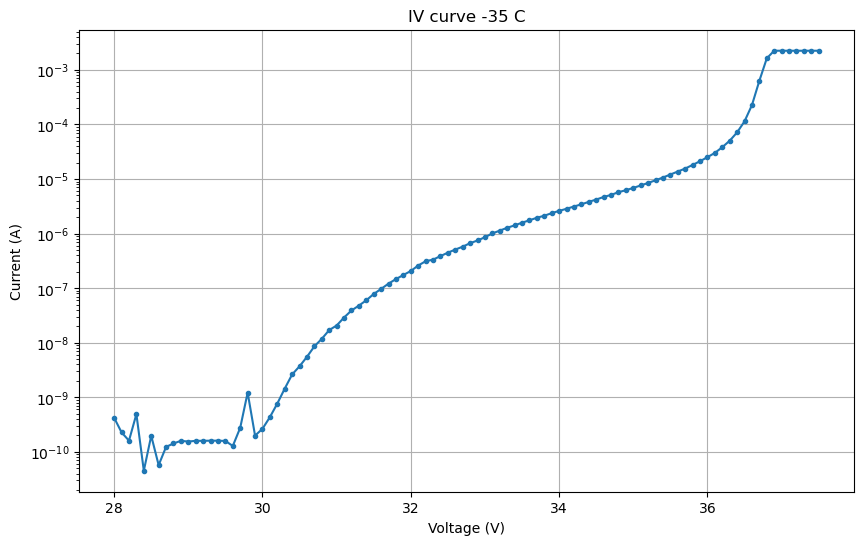

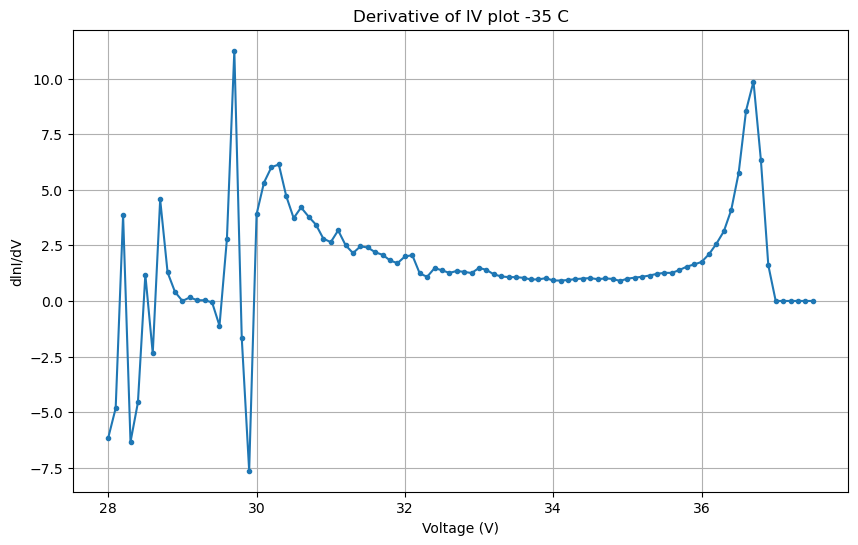

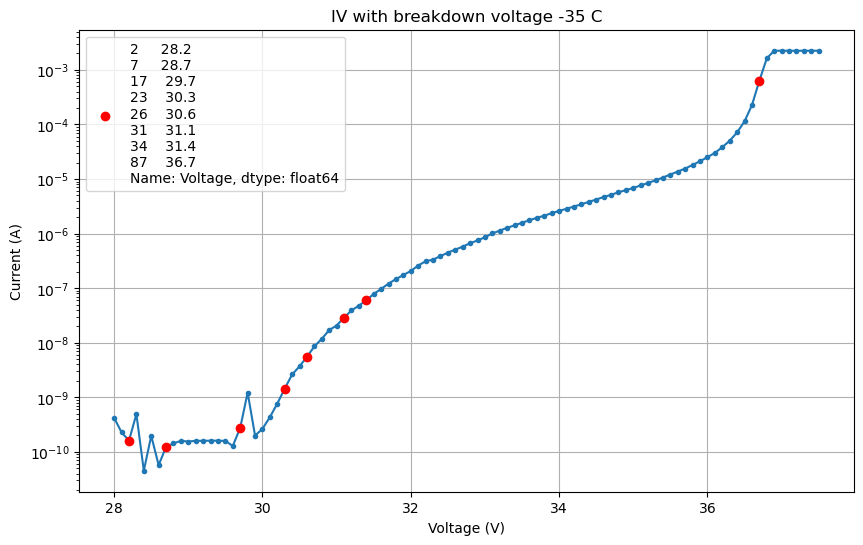

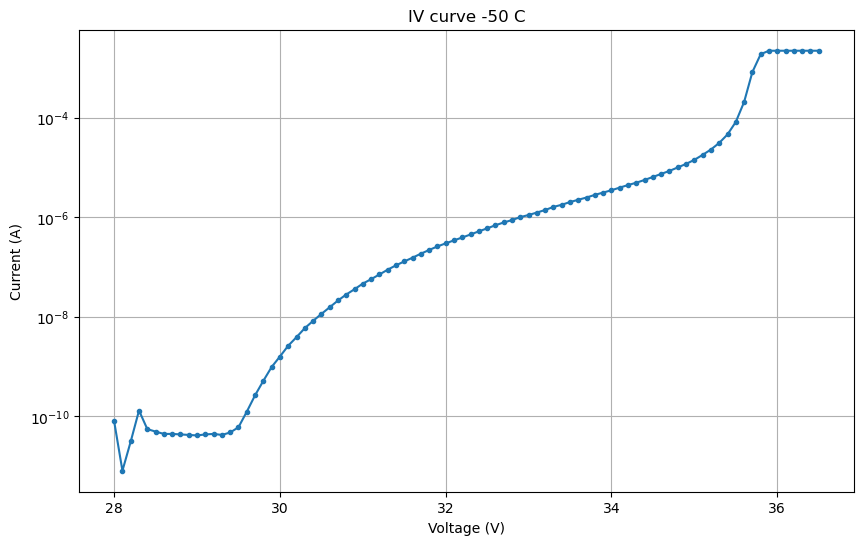

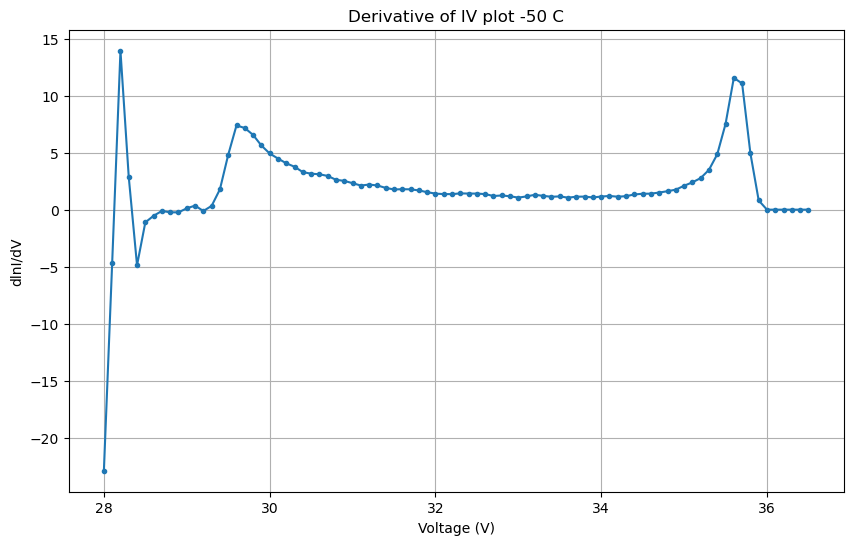

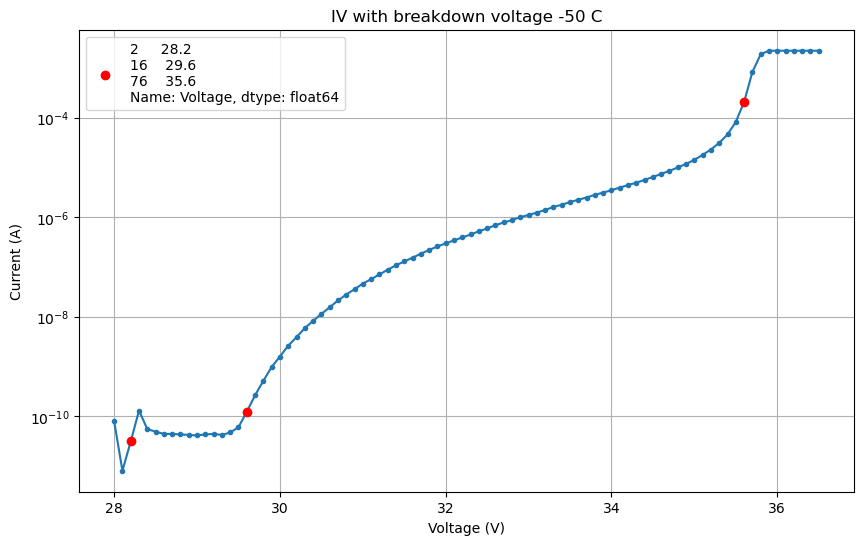

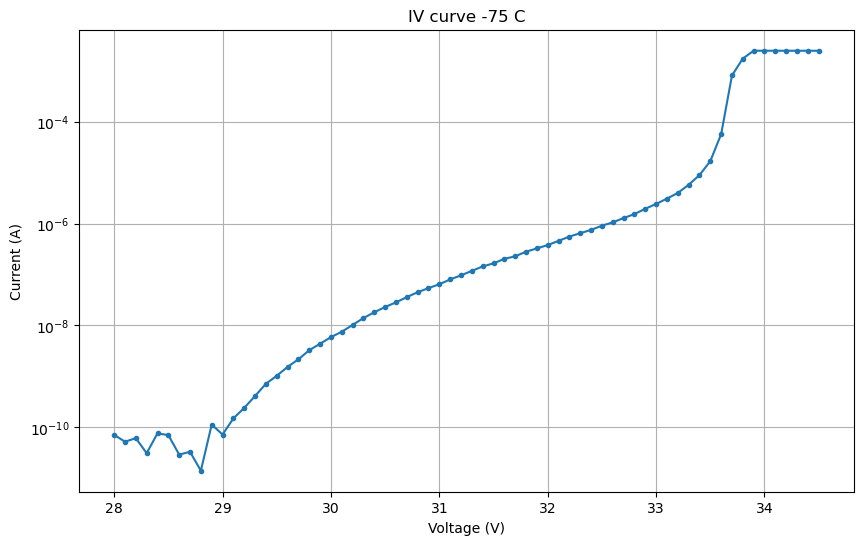

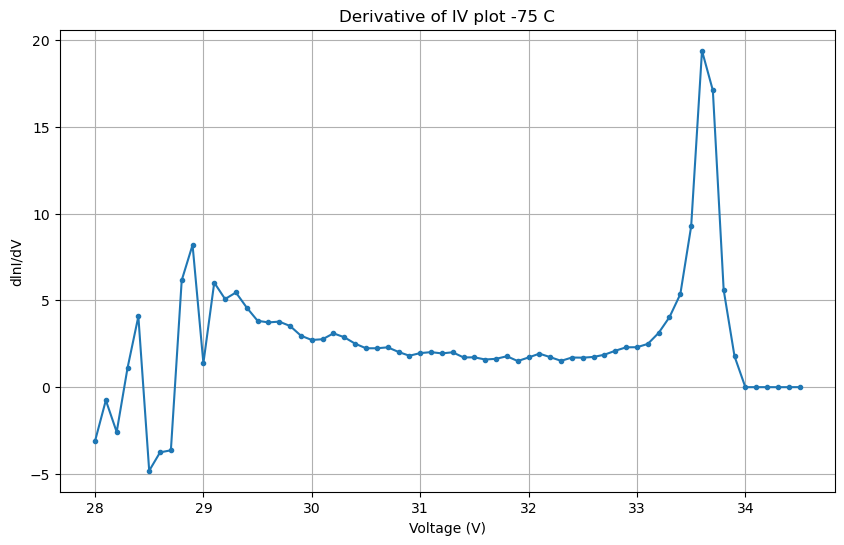

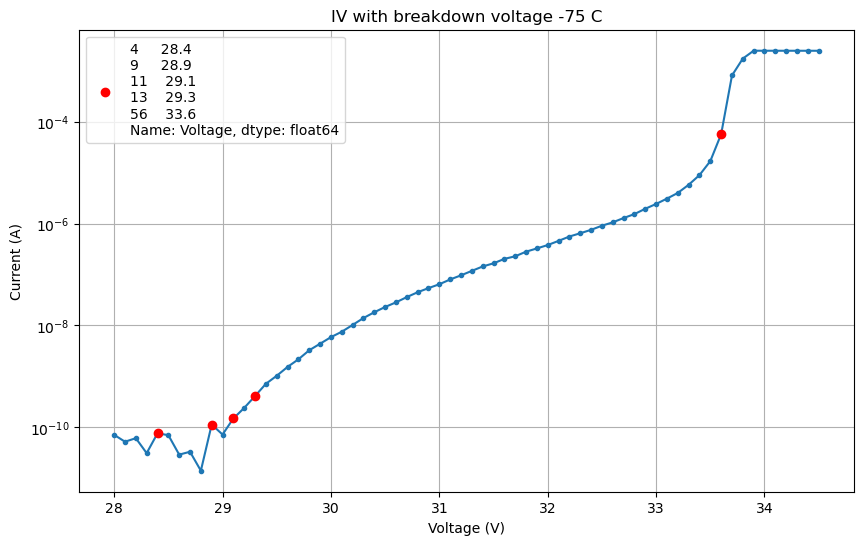

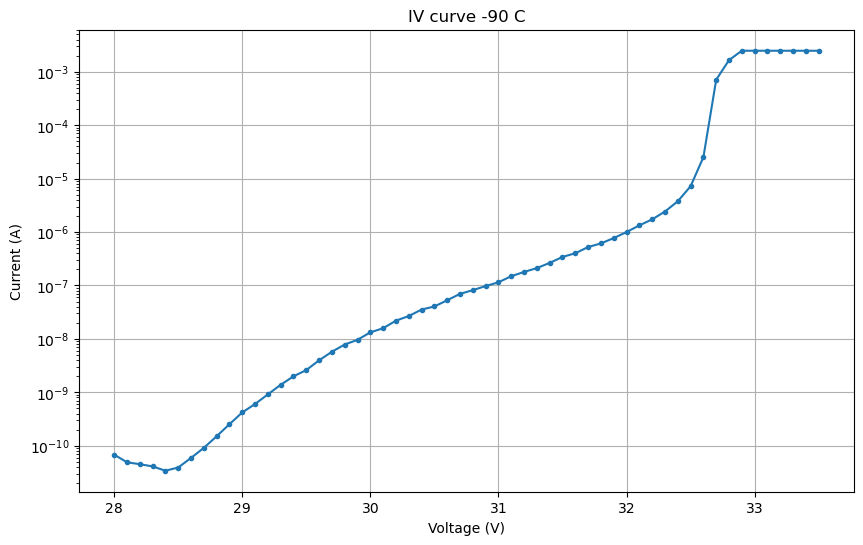

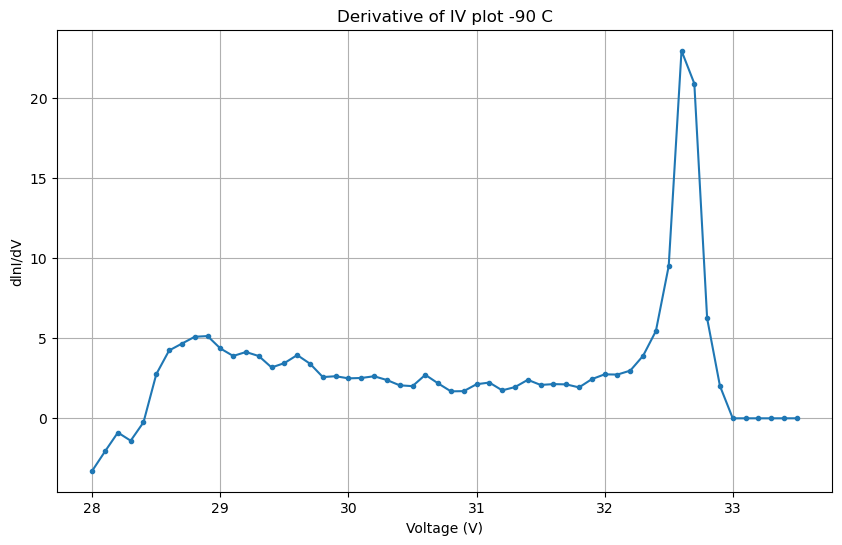

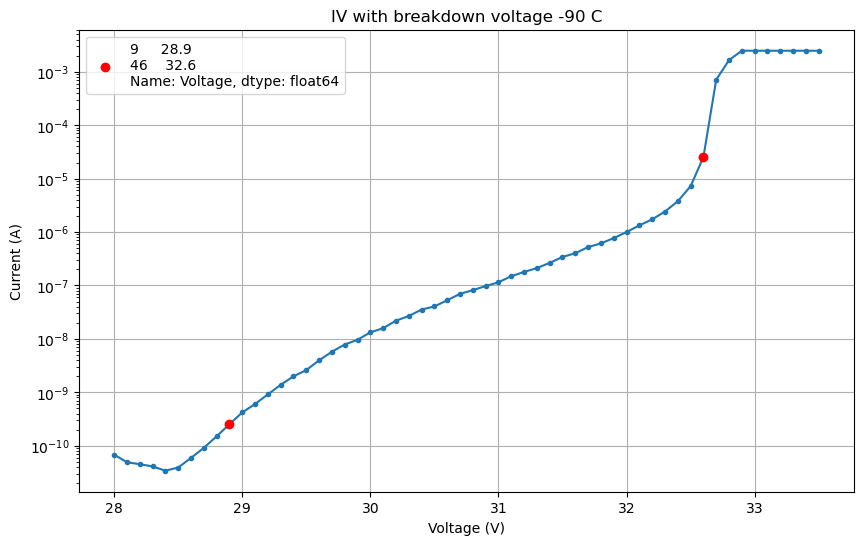

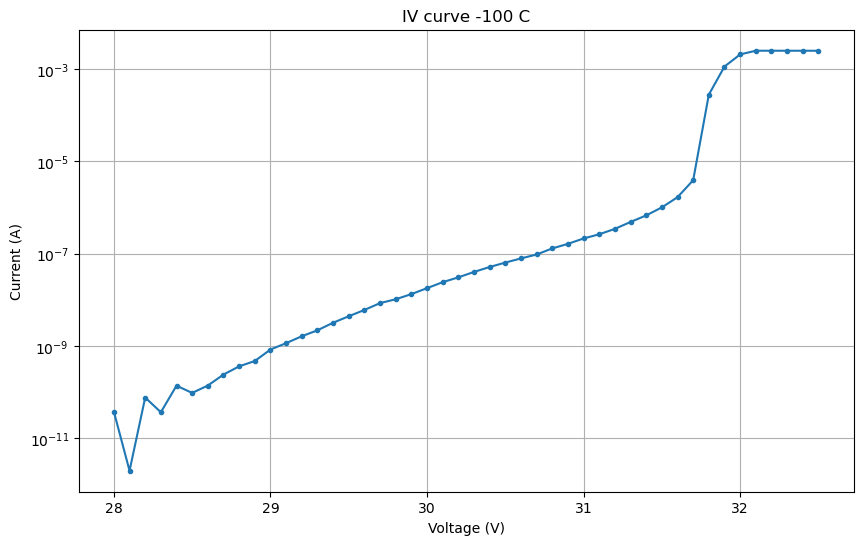

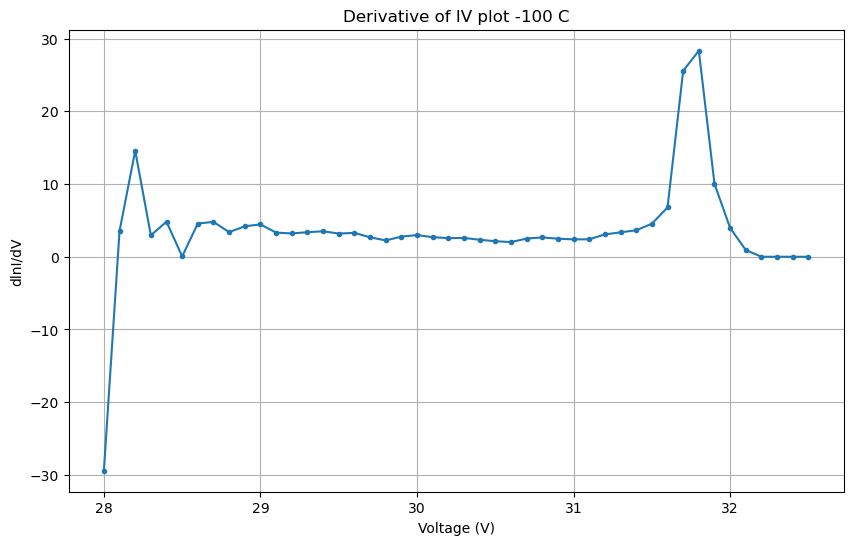

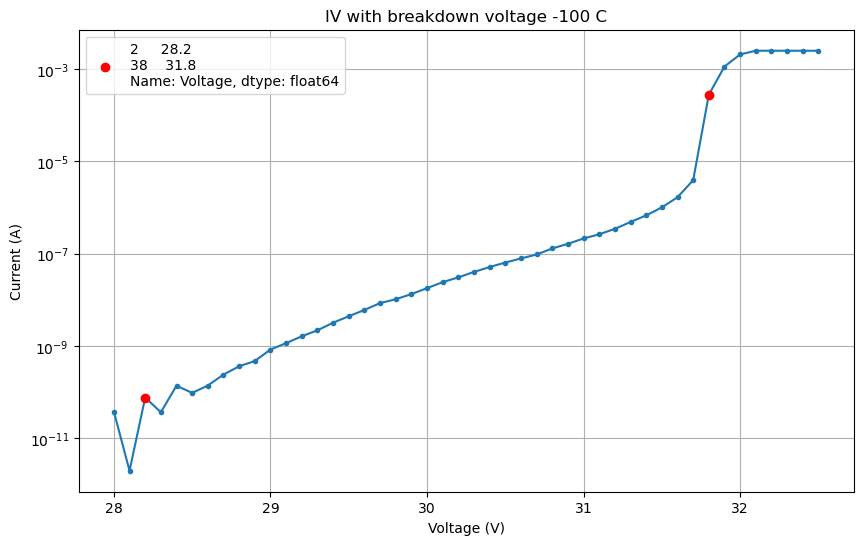

In [71]:
breakdown_voltages = []
second_divergences = []
plot_iv_breakdown(csv_files, labels)

In [171]:
temps = [label_to_temp_kelvin(label) for label in labels]
print(temps)

[273, 295, 263, 258, 248, 238, 223, 198, 183]


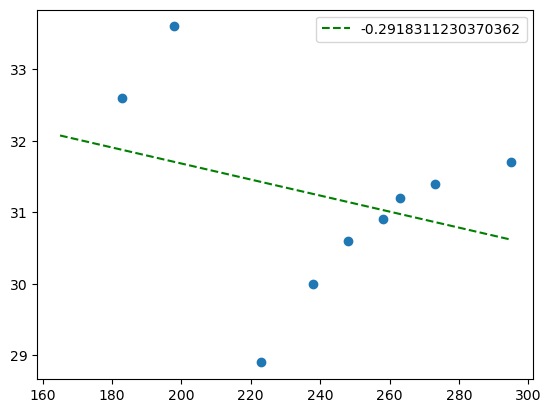

In [172]:
plt.plot(figsize=(10,6))
plt.scatter(np.array(temps), np.array(breakdown_voltages))
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(temps), np.array(breakdown_voltages))
x = np.linspace(165, max(np.array(temps)), 100)
y = slope * x + intercept
plt.plot(x,y, '--', color = 'green', label = r_value)
plt.legend()

In [39]:
temps = [22, 0, -10, -15, -25, -35, -50, -75, -90, -100]
breakdown_voltages = [31.7, 31.4, 31.2, 30.9, 30.6, 30.3, 29.6, 29.1, 28.9, 28.5]

In [40]:
def celsius_to_kelvin(celsius_temp):
    return celsius_temp + 273

In [41]:
temps_kelvin = [celsius_to_kelvin(temp) for temp in temps]
print(temps_kelvin)

[295, 273, 263, 258, 248, 238, 223, 198, 183, 173]


0.027820713091616645


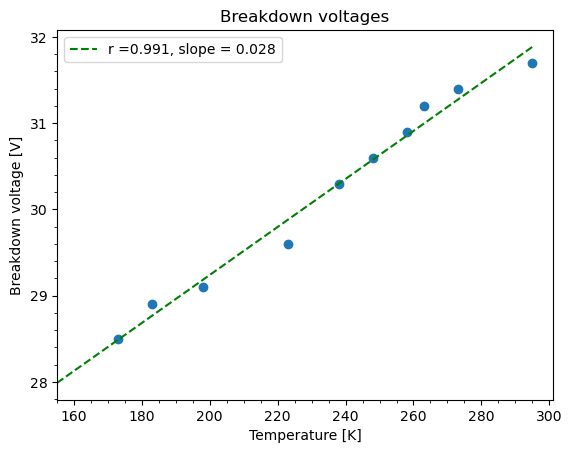

In [53]:
plt.plot(figsize=(10,6))
plt.scatter(np.array(temps_kelvin), np.array(breakdown_voltages))
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(temps_kelvin), np.array(breakdown_voltages))
x = np.linspace(155, max(np.array(temps_kelvin)), 100)
plt.xlim(left=155)
y = slope * x + intercept
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
plt.plot(x,y, '--', color = 'green', label = f'r ={r_value:.3f}, slope = {slope:.3f}' )
plt.title('Breakdown voltages')
plt.xlabel('Temperature [K]')
plt.ylabel('Breakdown voltage [V]')
plt.legend()
print(slope)

In [203]:
print(temps_kelvin)
print(len(temps_kelvin))
print(breakdown_voltages)
print(len(breakdown_voltages))

[295, 273, 263, 258, 248, 238, 223, 198, 183]
9
[31.7, 31.4, 31.2, 30.9, 30.6, 30.3, 29.6, 29.1, 28.9]
9


In [22]:
second_divergence = [39.8, 38.7, 38.2, 37.9, 37.3, 36.7, 35.6, 33.6, 32.6, 31.8]
temps = [22, 0, -10, -15, -25, -35, -50, -75, -90, -100]
temps_kelvin = [celsius_to_kelvin(temp) for temp in temps]
print(temps_kelvin)

[295, 273, 263, 258, 248, 238, 223, 198, 183, 173]


0.0675039052865247


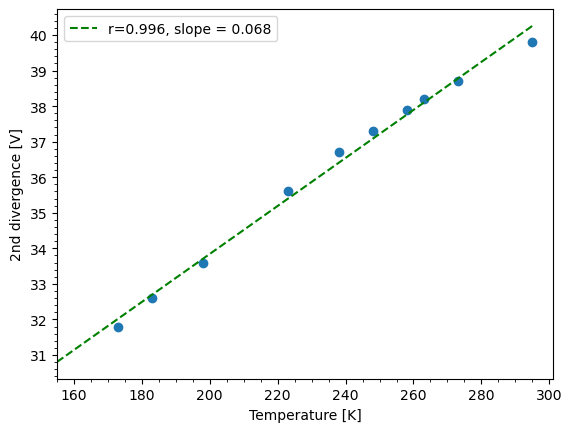

In [54]:
plt.plot(figsize=(10,6))
plt.scatter(np.array(temps_kelvin), np.array(second_divergence))
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(temps_kelvin), np.array(second_divergence))
x = np.linspace(155, max(np.array(temps_kelvin)), 100)
plt.xlim(left=155)
y = slope * x + intercept
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
plt.plot(x,y, '--', color = 'green', label = f'r={r_value:.3f}, slope = {slope:.3f}' )
plt.xlabel('Temperature [K]')
plt.ylabel('2nd divergence [V]')
plt.legend()
print(slope)

In [56]:
operating_range = [sd - bv for sd, bv in zip(second_divergence, breakdown_voltages)]
print(operating_range)

[8.099999999999998, 7.300000000000004, 7.0000000000000036, 7.0, 6.699999999999996, 6.400000000000002, 6.0, 4.5, 3.700000000000003, 3.3000000000000007]


0.03968319219490805


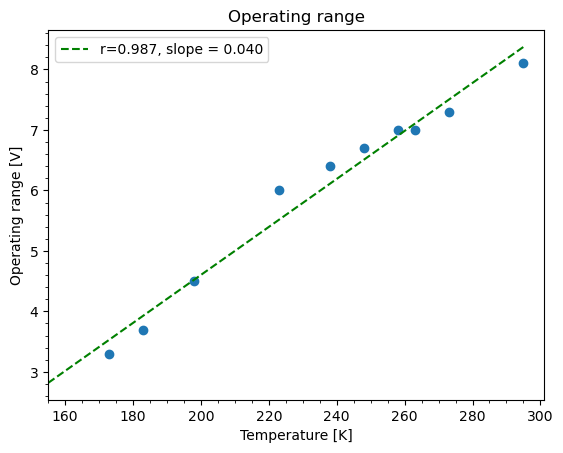

In [58]:
plt.plot(figsize=(10,6))
plt.scatter(np.array(temps_kelvin), np.array(operating_range))
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(temps_kelvin), np.array(operating_range))
x = np.linspace(155, max(np.array(temps_kelvin)), 100)
plt.xlim(left=155)
y = slope * x + intercept
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
plt.plot(x,y, '--', color = 'green', label = f'r={r_value:.3f}, slope = {slope:.3f}' )
plt.title('Operating range')
plt.xlabel('Temperature [K]')
plt.ylabel('Operating range [V]')
plt.legend()
print(slope)